<a href="https://colab.research.google.com/github/nov05/Google-Colaboratory/blob/master/20250407_Copy_of_USL_Project_LearnerNotebook_LowCode0406.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [ ]:
## ⚠️ update some packages in colab according to yellowbrick installation information
## ⚠️ Here's a handy trick — just copy and paste the error messages into ChatGPT and
## ask it to suggest the right versions to install. That way, you don’t have to deal
## with all the version compatibility headaches yourself.
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3
!pip install -U pandas==2.2.2 numpy==1.26.4 scikit-learn==1.4.2 matplotlib==3.8.3 yellowbrick seaborn

```
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
mizani 0.13.2 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
Successfully installed matplotlib-3.7.1 numpy-1.25.2 pandas-1.5.3 scikit-learn-1.2.2 seaborn-0.13.1
WARNING: The following packages were previously imported in this runtime:
  [matplotlib,mpl_toolkits,numpy]
You must restart the runtime in order to use newly installed versions.
```

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
## loading data
# data = pd.read_csv('stock_data.csv')
# data = pd.read_csv('/content/drive/MyDrive/stock_data.csv')
## https://drive.google.com/file/d/1PTB5PEMHnc_KDHEbdRcbcgT7sgf8Ni59
data = pd.read_csv("https://drive.google.com/uc?id=1PTB5PEMHnc_KDHEbdRcbcgT7sgf8Ni59")
print(data.shape)
data.sample(3)

(340, 15)


,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
294,TRV,The Travelers Companies Inc.,Financials,Property & Casualty Insurance,112.860001,13.029548,0.959365,15,99,6000000,3439000000,10.99,312920837.1,10.269336,-0.891599
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,849367088.6,93.089287,17.345857
115,ETFC,E*Trade,Financials,Investment Banking & Brokerage,29.639999,12.656785,1.452048,5,99,450000000,268000000,0.92,291304347.8,32.217390,-0.597313


## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [ ]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**

* The Ticker Symbol, Security, ICS Sub Industry, and GICS Sub Industry are categorical variables with 340 unique levels, representing each stock.
* There are 5 columns of integer (int) type and 7 columns of float type.

### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [ ]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing values in the data
df.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


There are no duplicated values and no missing values in our data.

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Current Price`**

CPU times: user 160 ms, sys: 95.4 ms, total: 256 ms
Wall time: 152 ms


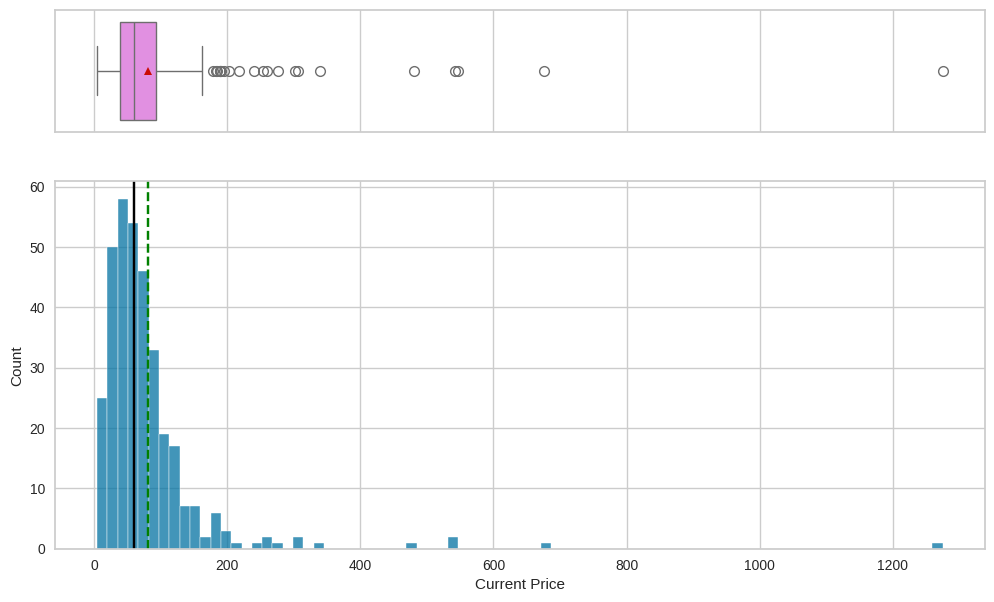

In [ ]:
%%time
histogram_boxplot(df, 'Current Price')

**`Price Change`**

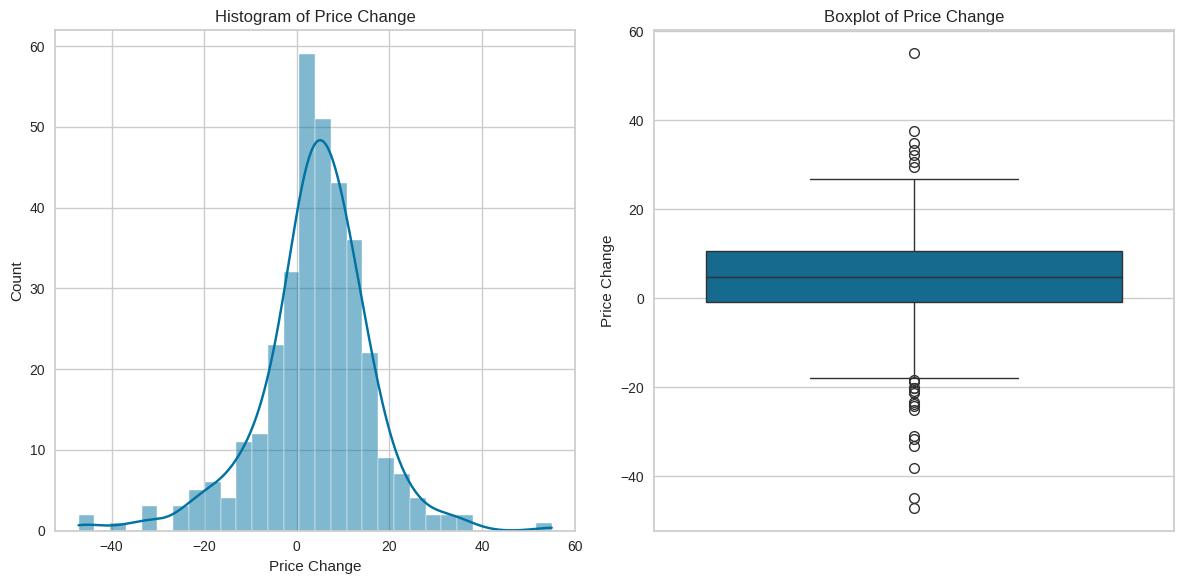

In [ ]:
def histogram_boxplot(column_name):
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], bins=30, kde=True)
    plt.title(f'Histogram of {column_name}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column_name])
    plt.title(f'Boxplot of {column_name}')

    plt.tight_layout()
    plt.show()

# Call the function with the column name
histogram_boxplot('Price Change')

**`Volatility`**

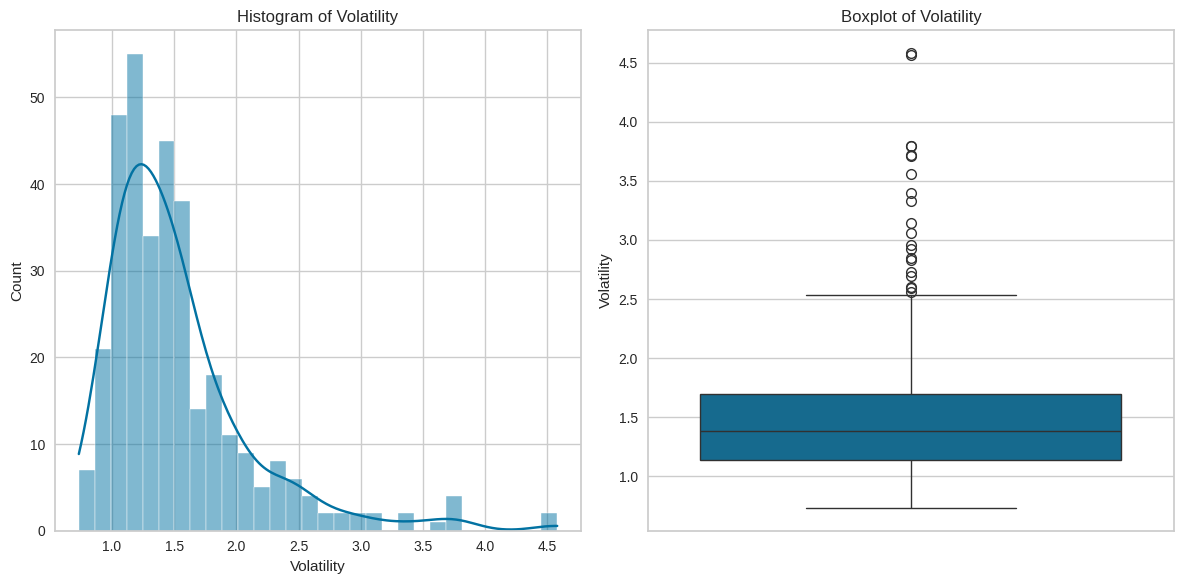

In [ ]:
histogram_boxplot('Volatility')

**`ROE`**

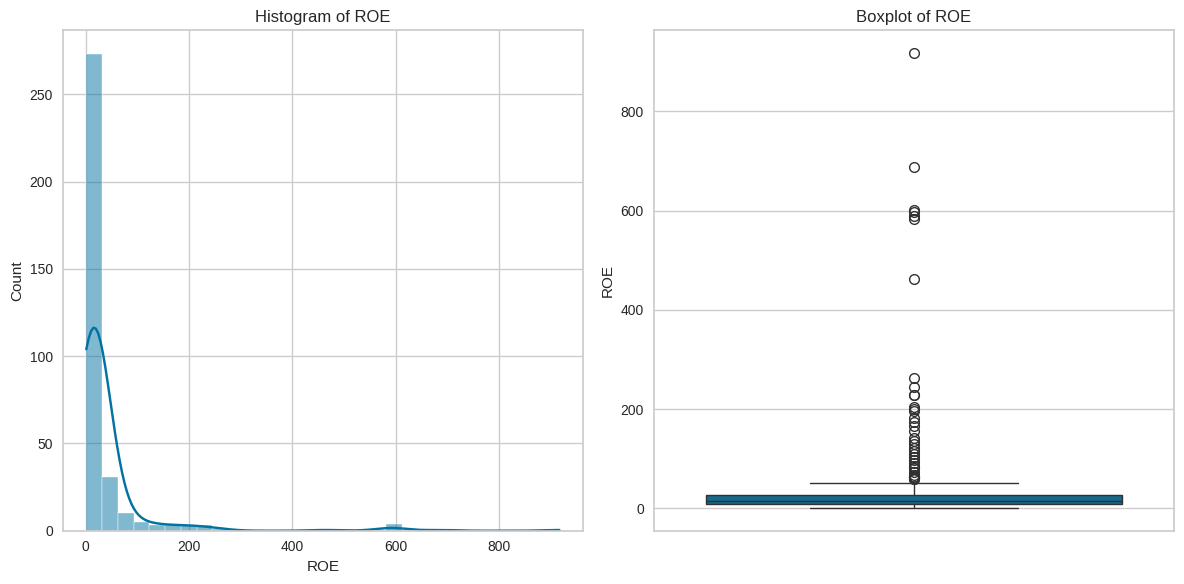

In [ ]:
histogram_boxplot('ROE')

**`Cash Ratio`**

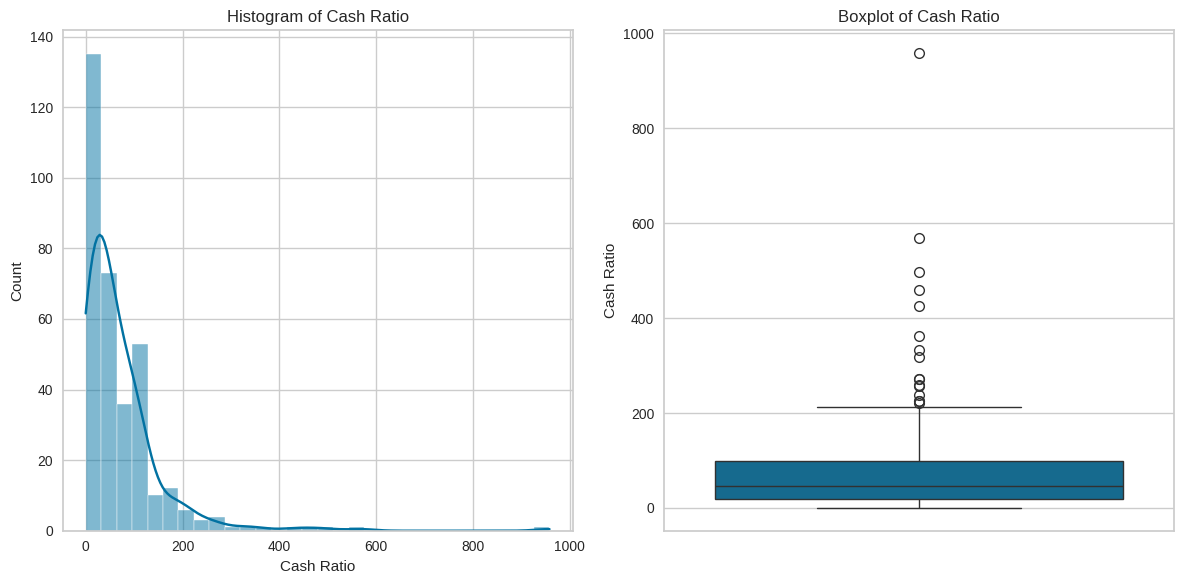

In [ ]:
histogram_boxplot('Cash Ratio')

**`Net Cash Flow`**

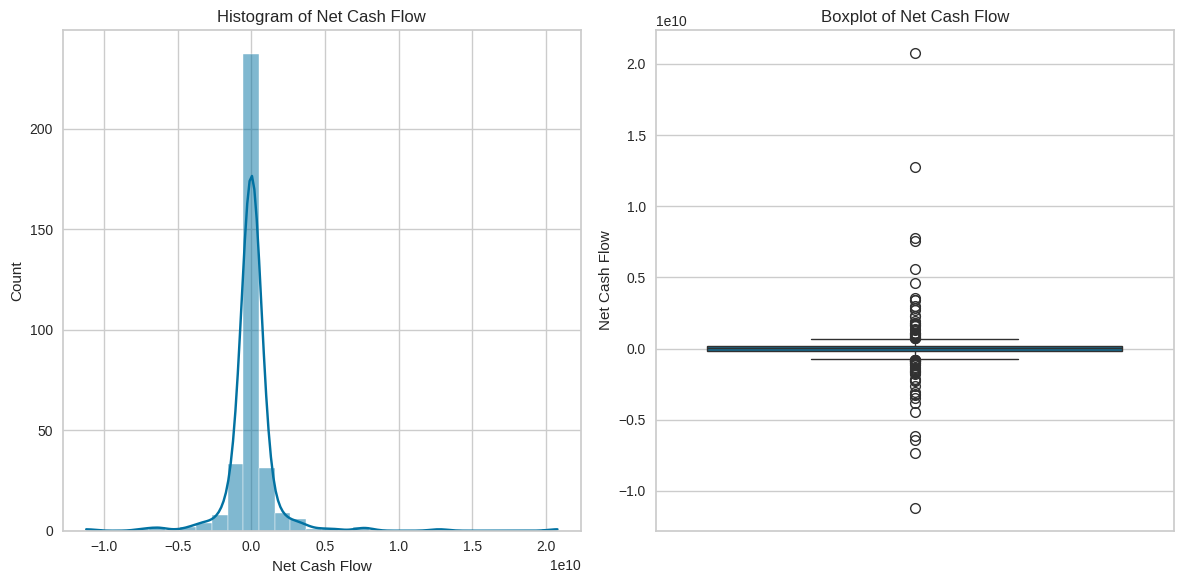

In [ ]:
histogram_boxplot('Net Cash Flow')

**`Net Income`**

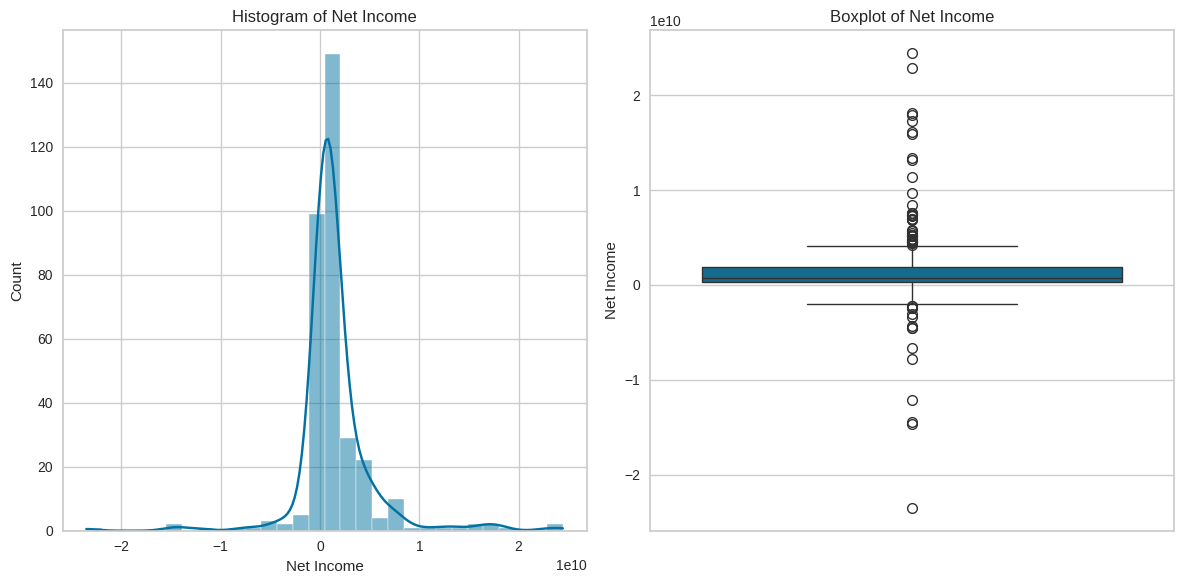

In [ ]:
histogram_boxplot('Net Income')

**`Earnings Per Share`**

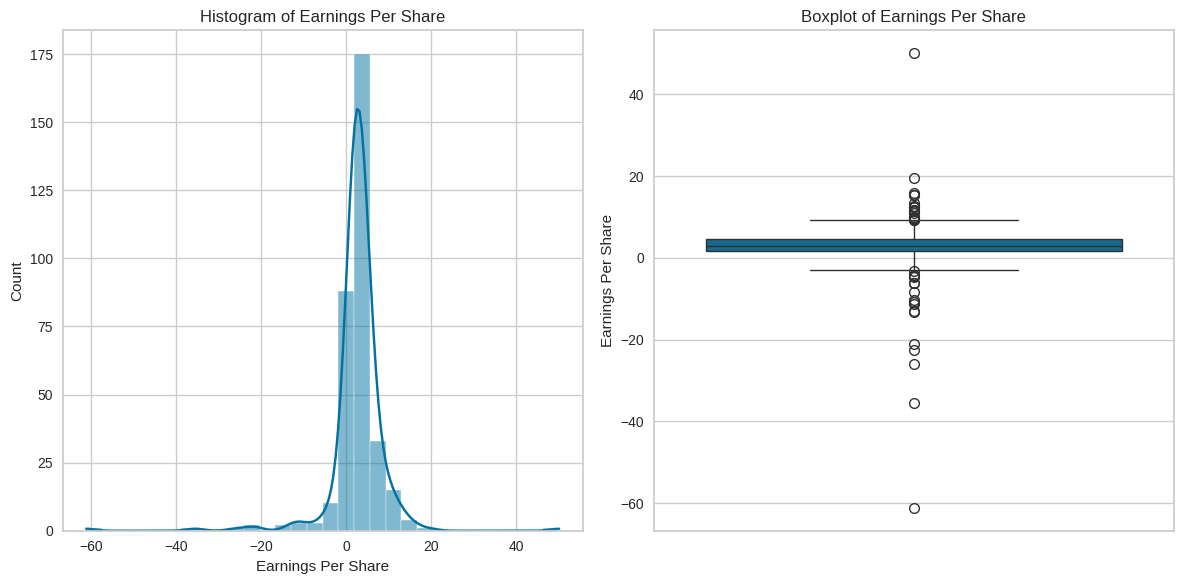

In [ ]:
histogram_boxplot('Earnings Per Share')

**`Estimated Shares Outstanding`**

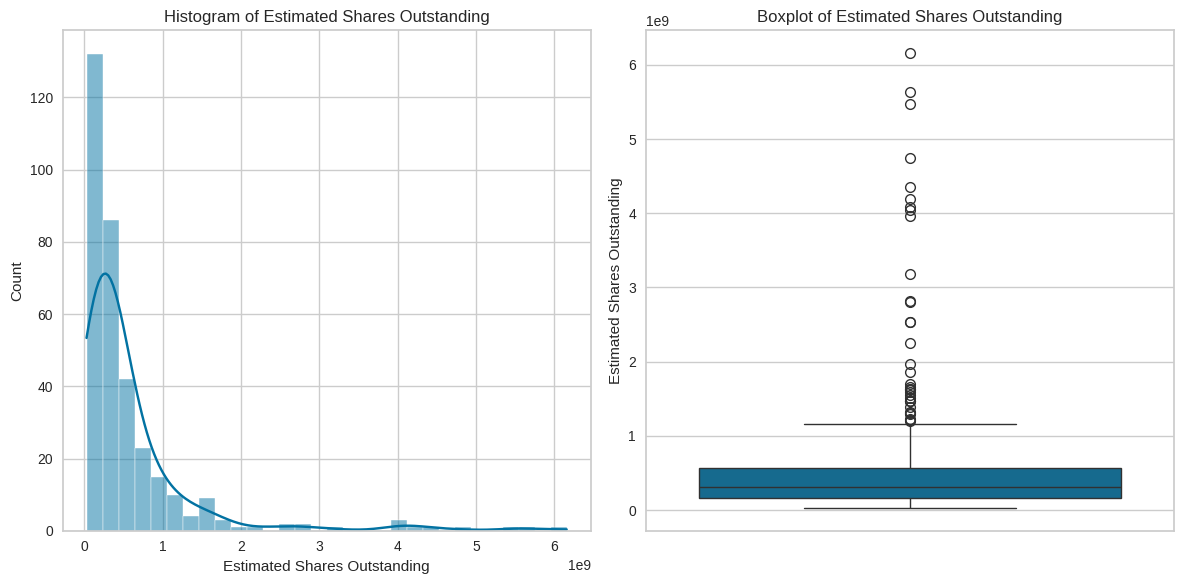

In [ ]:
histogram_boxplot('Estimated Shares Outstanding')

**`P/E Ratio`**

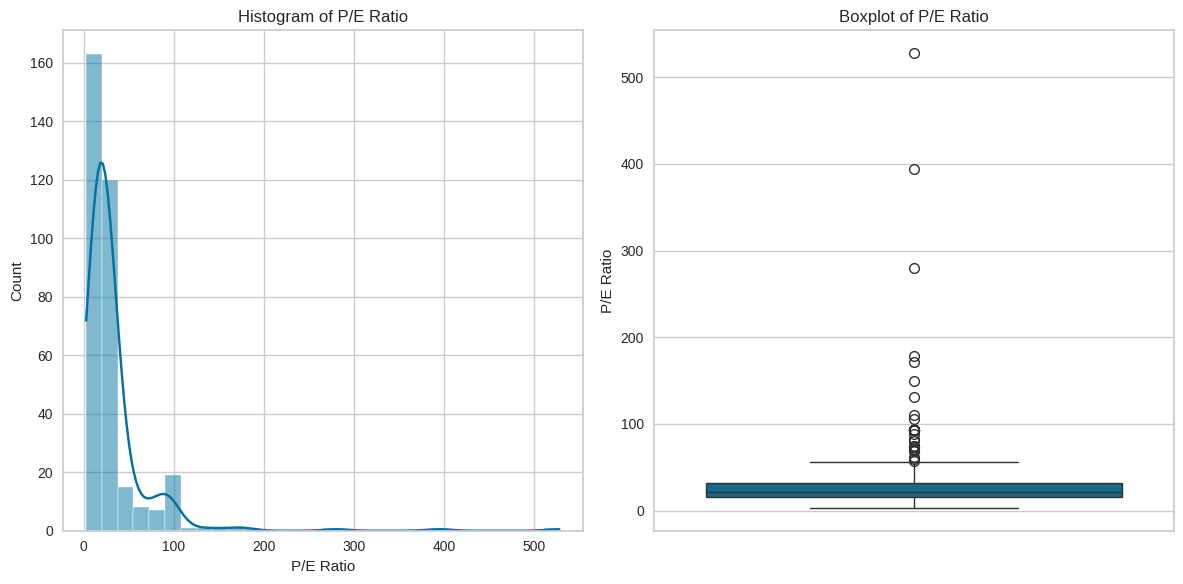

In [ ]:
histogram_boxplot('P/E Ratio')

**`P/B Ratio`**

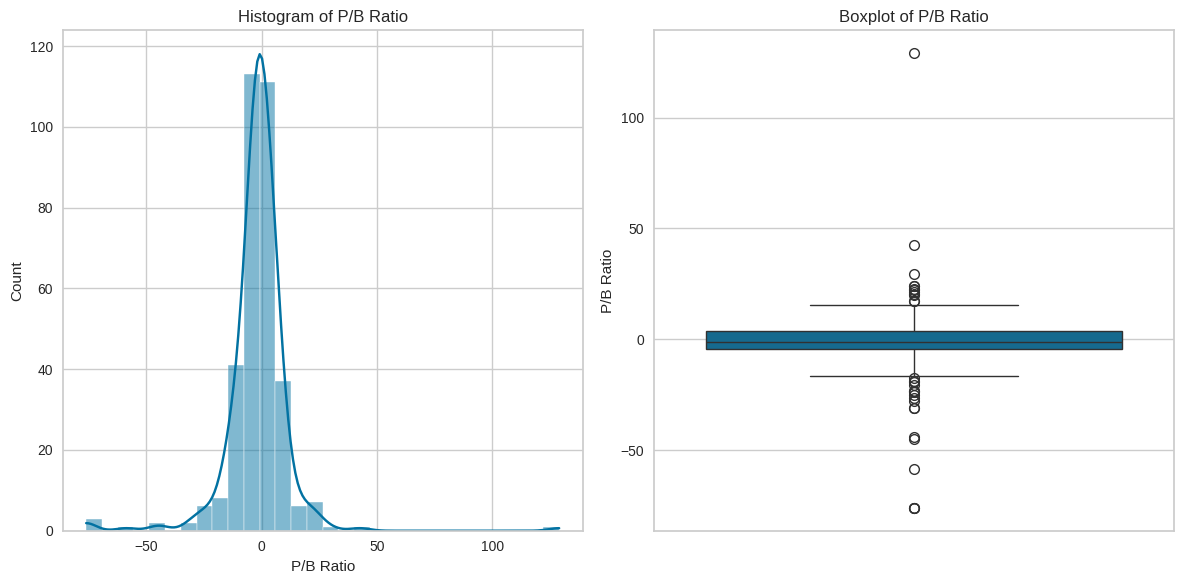

In [ ]:
histogram_boxplot('P/B Ratio')

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # plt.xticks(rotation=90, fontsize=15)
    plt.xticks(rotation=45, ha='right') ## ⚠️ aesthetic changes
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

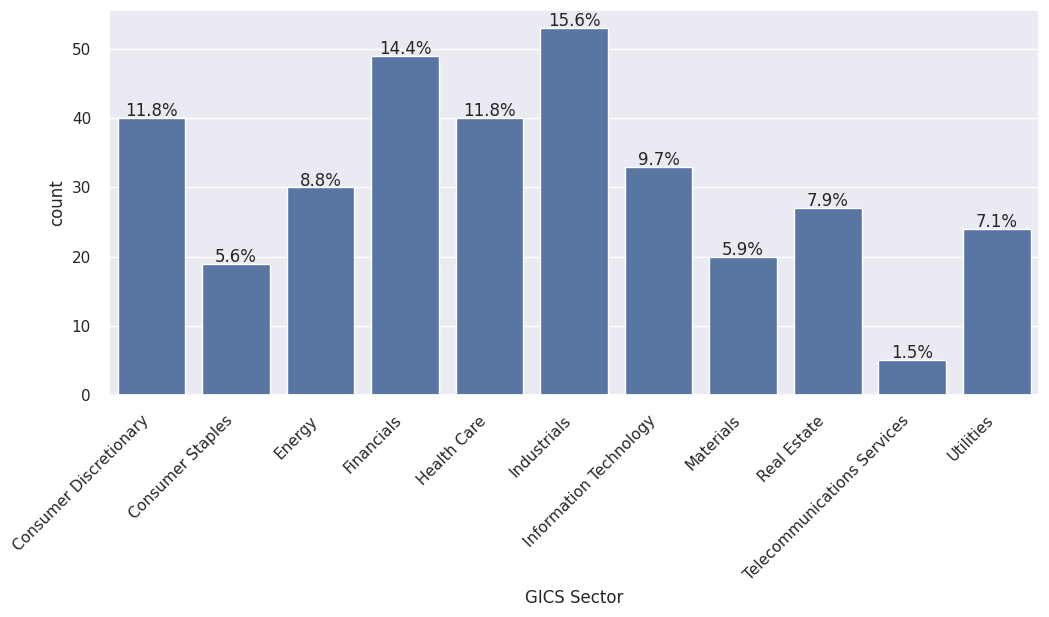

CPU times: user 268 ms, sys: 88.2 ms, total: 356 ms
Wall time: 258 ms


In [ ]:
%%time
labeled_barplot(df, 'GICS Sector', perc=True)

In [ ]:
## ⚠️ I guess here you wanted to sort by percentage
df_tmp = pd.concat([
    df['GICS Sector'].value_counts().sort_values(ascending=False),
    df['GICS Sector'].value_counts(normalize=True).sort_values(ascending=False),
], axis=1)
df_tmp.columns = ['count', 'percentage']
df_tmp

,count,percentage
GICS Sector,,
Industrials,53,0.155882
Financials,49,0.144118
Health Care,40,0.117647
Consumer Discretionary,40,0.117647
Information Technology,33,0.097059
Energy,30,0.088235
Real Estate,27,0.079412
Utilities,24,0.070588
Materials,20,0.058824


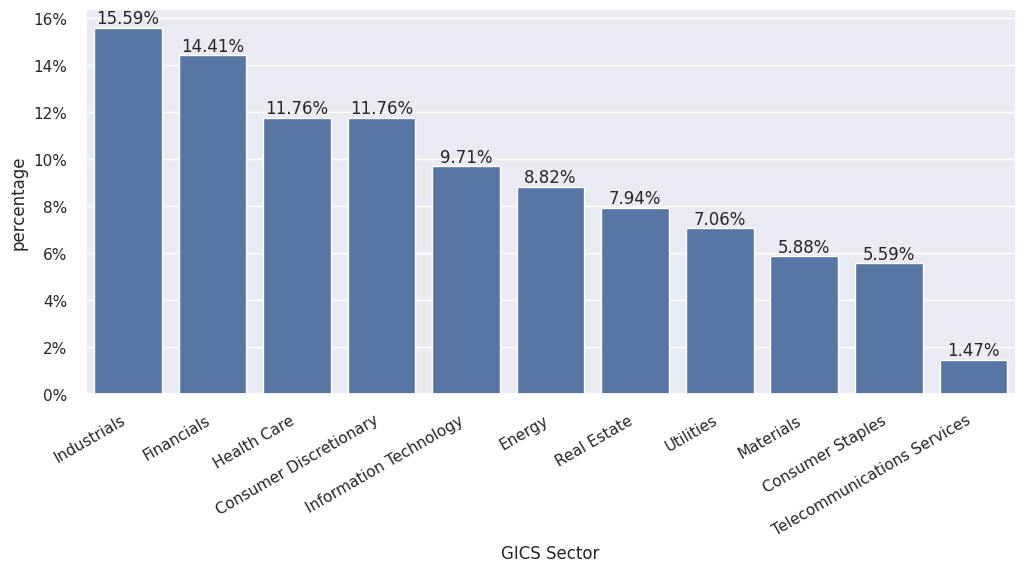

In [ ]:
## ⚠️ added by nov05
from matplotlib.ticker import FuncFormatter

# function to create labeled barplots
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    df_plot = (
        df[feature]
        .value_counts(normalize=True)
        .sort_values(ascending=False)
        .mul(100)  ## Multiply by 100 to get percentage
        .rename('percentage')
    )
    plt.xticks(rotation=30, ha='right')
    ax = sns.barplot(df_plot)

    # Customizing the y-axis ticks with percentage sign
    formatter = FuncFormatter(lambda y, _: f'{y:.0f}%')
    ax.yaxis.set_major_formatter(formatter)

    # Add annotations on top of each bar
    for i, v in enumerate(df_plot):
        ## ⚠️ you can change v, e.g. v+1 or v-1, to adjust the relative distance between the annotations and the bars
        ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.show()  # show the plot

labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

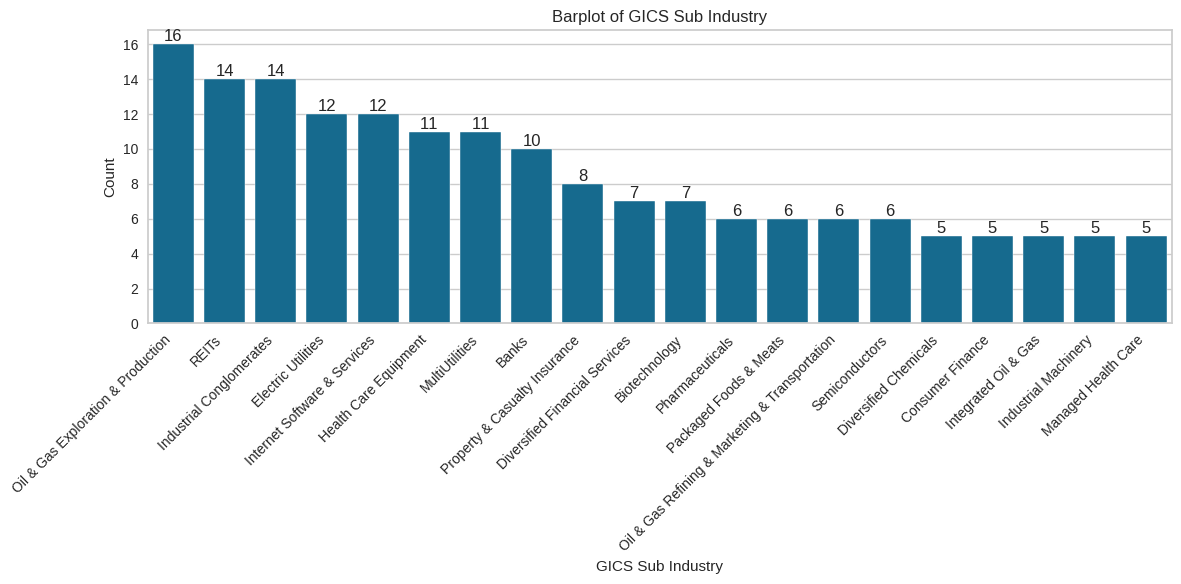

In [ ]:
def labeled_barplot(column_name):
    plt.figure(figsize=(12, 6))

    # Count occurrences of each category
    counts = df[column_name].value_counts().head(20)

    # Create barplot
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Barplot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add labels on top of the bars
    for i in range(len(counts)):
        plt.text(i, counts.values[i], counts.values[i], ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Call the function with the column name
labeled_barplot('GICS Sub Industry')

**Observations**:

**Stocks** have a current price concentrated between **0 and 400**, with a gradual decline in frequency as prices increase.

**Price Change** values are mostly centered around zero, with a slight positive skew. This suggests that, on average, stocks tend to experience small positive price changes.

The distribution of stocks across various **GICS sectors**.
**Most Represented Sectors:**

**Industrials:** The largest segment, comprising **15.6%** of the total stocks.

**Consumer Discretionary and Health Care** are close behind, both accounting for **11.8%.**

**Financials:** Also significant, representing **14.4%**.


**Diversity of Categories**: The barplot illustrates a wide range of **GICS sub-industries**, indicating a diverse set of stocks within the dataset.

Most Represented **Sub Industries is Oil & Gas Exploration & Production**, with **16 stocks**.

**REITs and Industrial Conglomerates** also notable, both with **14 stocks**.


### Bivariate Analysis

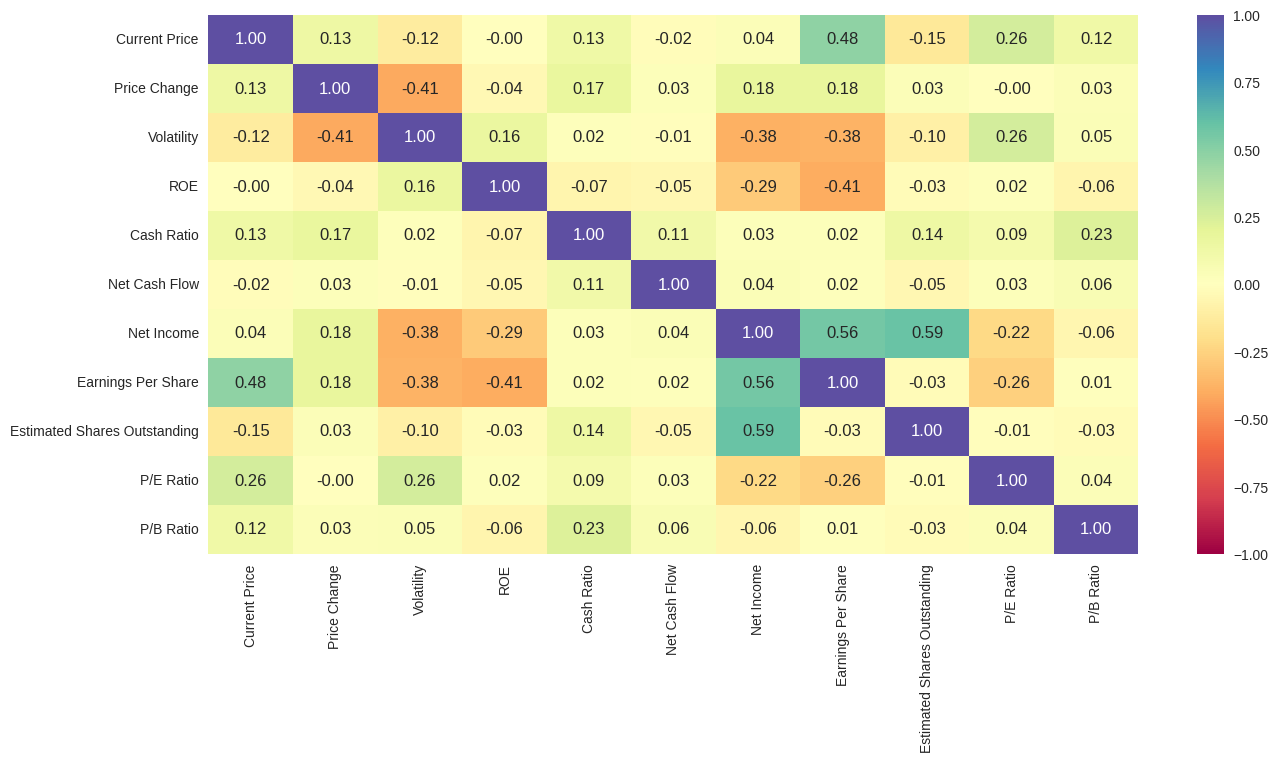

In [ ]:
# Filter for numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation and plot heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations for Correlation Matrix**

**Strong Positive Correlations:**

* **Net Income and Earnings Per Share (0.56):** This makes sense as earnings per share is directly calculated from net income and the number of outstanding shares.
* **Current Price and P/E Ratio (0.48):** Generally, a higher stock price can lead to a higher P/E ratio, assuming earnings remain relatively constant.

* **Current Price and P/B Ratio (0.75):** Similarly, a higher stock price tends to result in a higher Price-to-Book ratio, given the book value per share doesn't change dramatically in the short term.

**Strong Negative Correlations:**

* **Volatility and Net Income (-0.38):** Higher volatility might be associated with less stable or predictable net income.

* **Volatility and Earnings Per Share (-0.38):** Similar to net income, higher volatility could indicate less consistent earnings per share.

* **ROE and Net Income (-0.29):** This negative correlation is less intuitive and might require further investigation into the specific dataset. It could suggest that higher return on equity in this dataset is associated with lower overall net income, perhaps due to a smaller equity base.

* **ROE and Earnings Per Share (-0.41):** Similar to the relationship with net income, a higher ROE seems to be linked to lower EPS in this specific dataset.

* **Weak Correlations (close to 0):** Many pairs of features show weak correlations, indicated by the light yellow/beige colors. For example, the correlation between "Price Change" and "P/E Ratio" is 0.03, suggesting a very weak linear relationship between the recent price change and the current P/E ratio.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

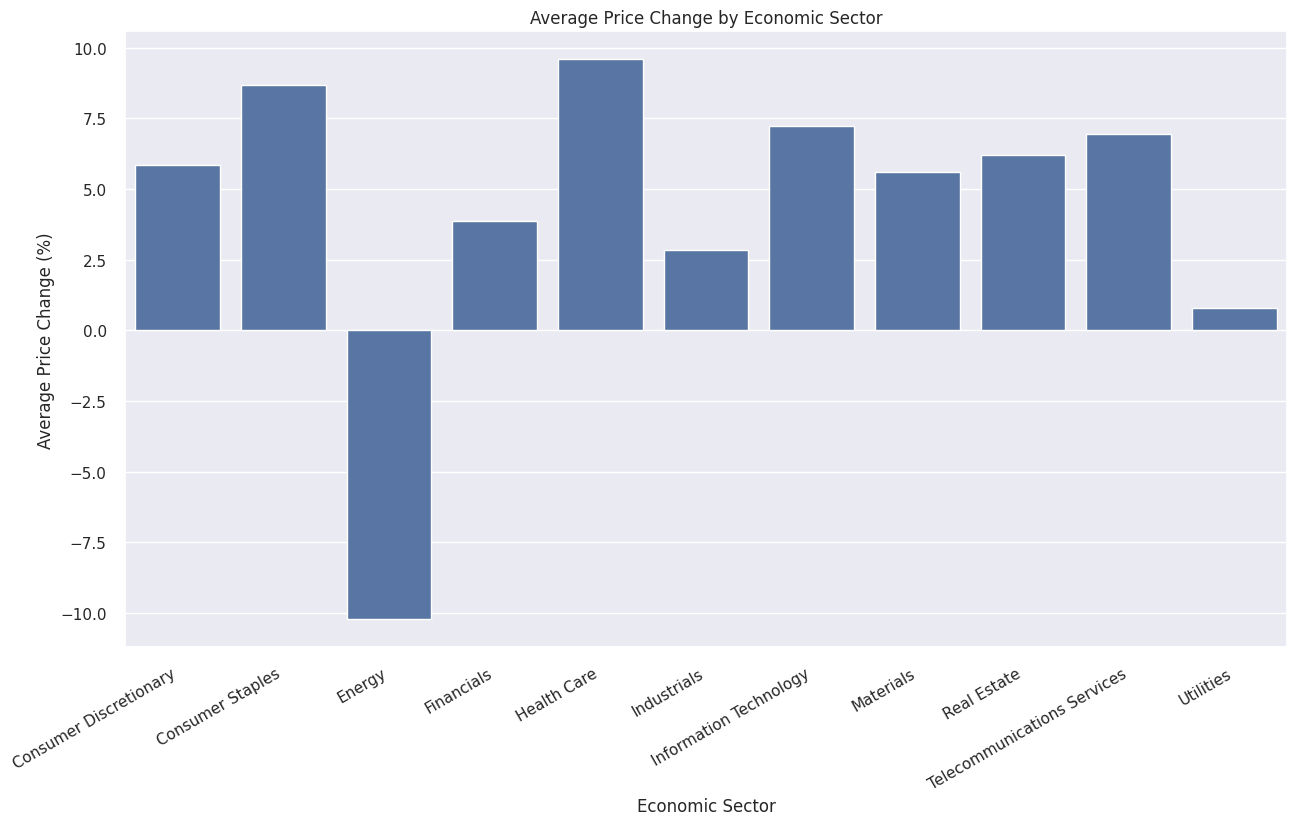

In [ ]:
# Calculate average price change by economic sector
avg_price_change = df.groupby('GICS Sector')['Price Change'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_price_change, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=30, ha="right")
plt.title('Average Price Change by Economic Sector')
plt.ylabel('Average Price Change (%)')
plt.xlabel('Economic Sector')
plt.show()

**Observations:**

The chart provides a snapshot of how different segments of the economy have performed in terms of average price change over a specific period. The Energy sector experienced a decline on average, while most other sectors saw positive average price changes, with Health Care, Consumer Staples, and Information Technology showing the strongest positive performance.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

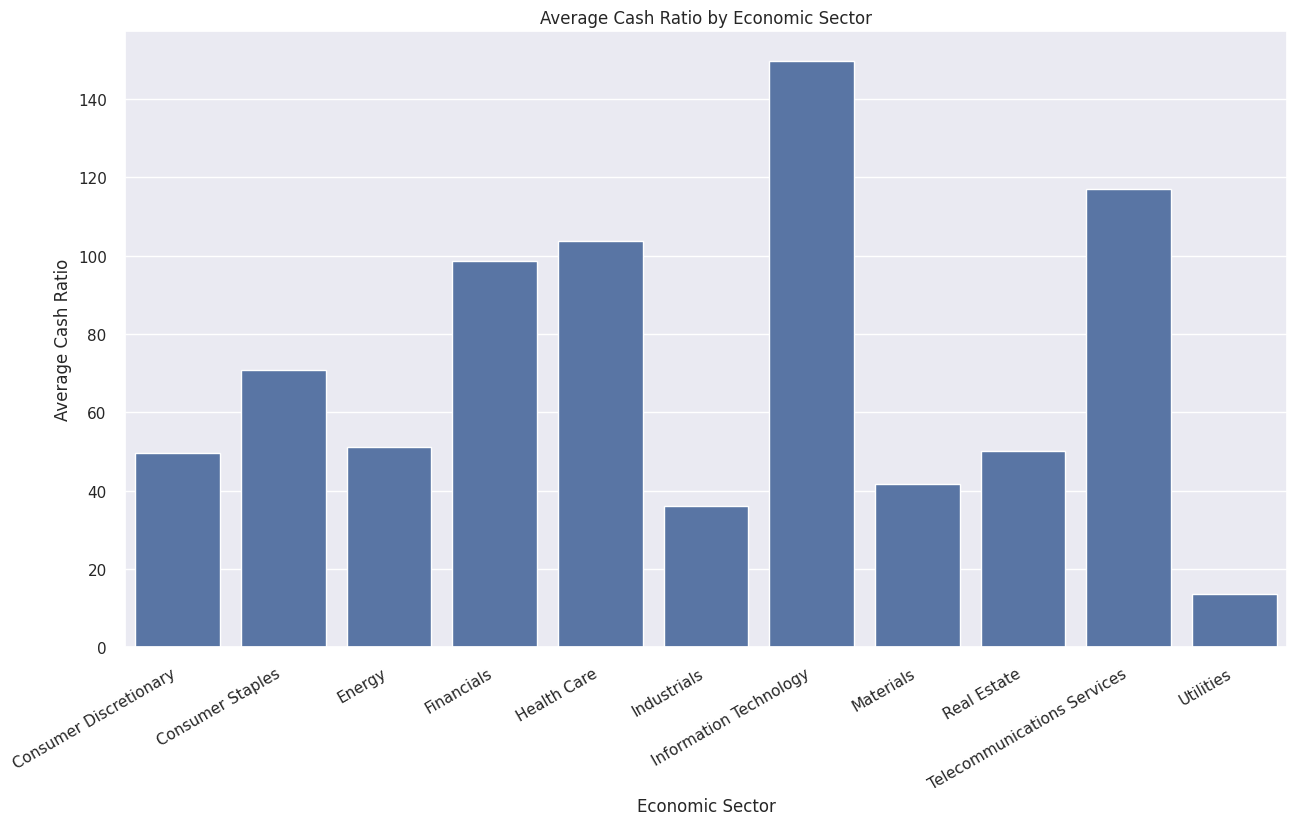

In [ ]:
# Calculate average cash ratio by economic sector
avg_cash_ratio = df.groupby('GICS Sector')['Cash Ratio'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_cash_ratio, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=30, ha='right')
plt.title('Average Cash Ratio by Economic Sector')
plt.ylabel('Average Cash Ratio')
plt.xlabel('Economic Sector')
plt.show()

**Observations:**

**Highest Average Cash Ratio:** The Information Technology sector has a significantly higher average cash ratio compared to all other sectors.

**Relatively High Average Cash Ratio:** Telecommunications Services and Health Care also exhibit relatively high average cash ratios. Financials also shows a notable average cash ratio.

**Lower Average Cash Ratio:** Consumer Discretionary, Industrials, and Materials show lower average cash ratios.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

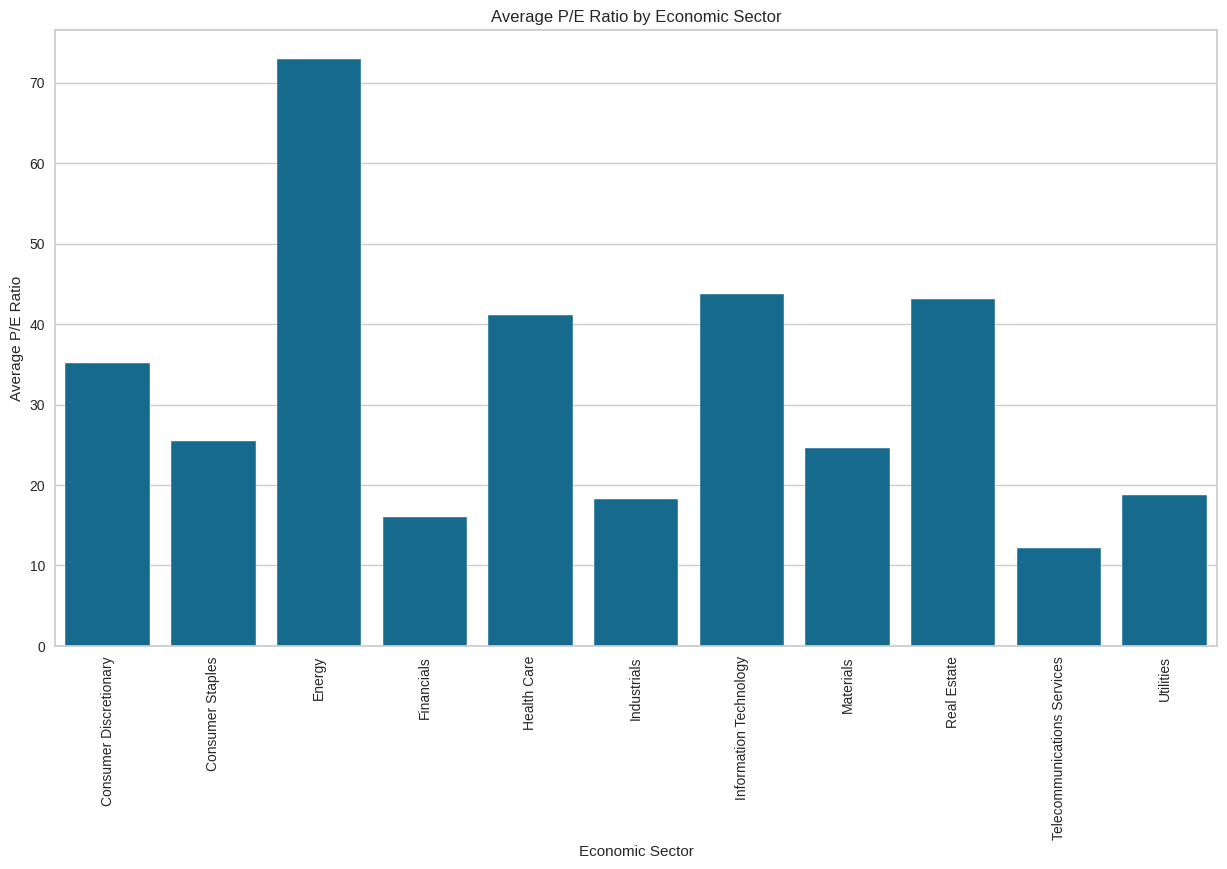

In [ ]:
# Calculate average P/E ratio by economic sector
avg_pe_ratio = df.groupby('GICS Sector')['P/E Ratio'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_pe_ratio, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.title('Average P/E Ratio by Economic Sector')
plt.ylabel('Average P/E Ratio')
plt.xlabel('Economic Sector')
plt.show()

**Observations:**

**Highest Average P/E Ratio:** The **Energy** sector exhibits a significantly higher average P/E ratio compared to all other sectors. This often indicates that investors have high growth expectations for the earnings of companies in this sector, or that current earnings are relatively low.

**Relatively High Average P/E Ratio:** **Information Technology and Health Car**e also show relatively high average P/E ratios, suggesting growth potential or higher valuation multiples.


**Lowest Average P/E Ratio:** The **Telecommunications Services** sector has the lowest average P/E ratio.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

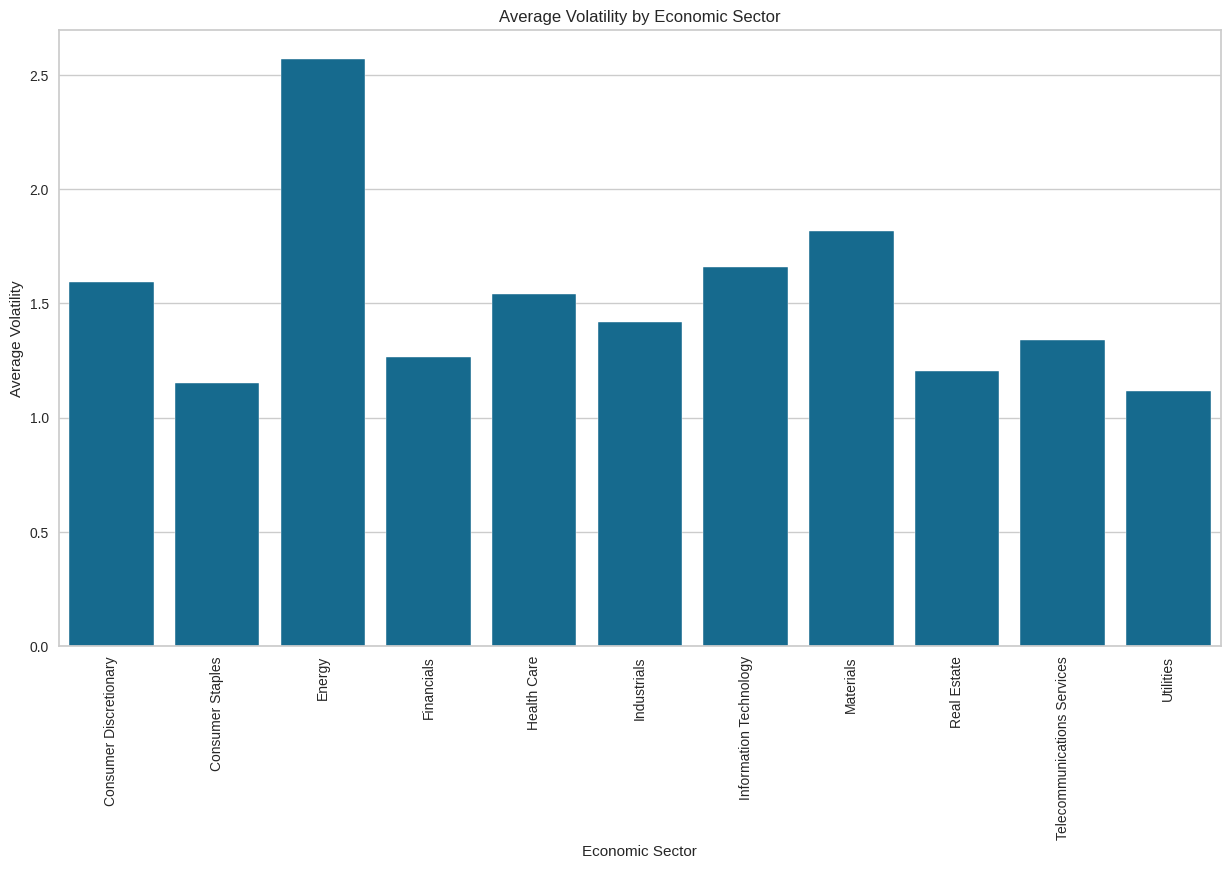

In [ ]:
# Calculate average volatility by economic sector
avg_volatility = df.groupby('GICS Sector')['Volatility'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_volatility, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.title('Average Volatility by Economic Sector')
plt.ylabel('Average Volatility')
plt.xlabel('Economic Sector')
plt.show()

**Observations:**

**Highest Average Volatility:** The **Energy** sector exhibits the highest average volatility, **significantly higher than any other sector**. This is often due to the sensitivity of energy prices to global events, supply and demand dynamics, and geopolitical factors.

**Relatively High Average Volatility:** **Materials and Information Technology** also show relatively **high average volatility**. Technology stocks are often associated with growth and innovation, which can lead to greater price swings. The Materials sector can be sensitive to commodity prices and economic cycles.

**Lowest Average Volatility: Consumer Staples and Utilities exhibit the lowest average volatility.** These sectors are generally considered more defensive, with stable demand and less sensitivity to economic fluctuations.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

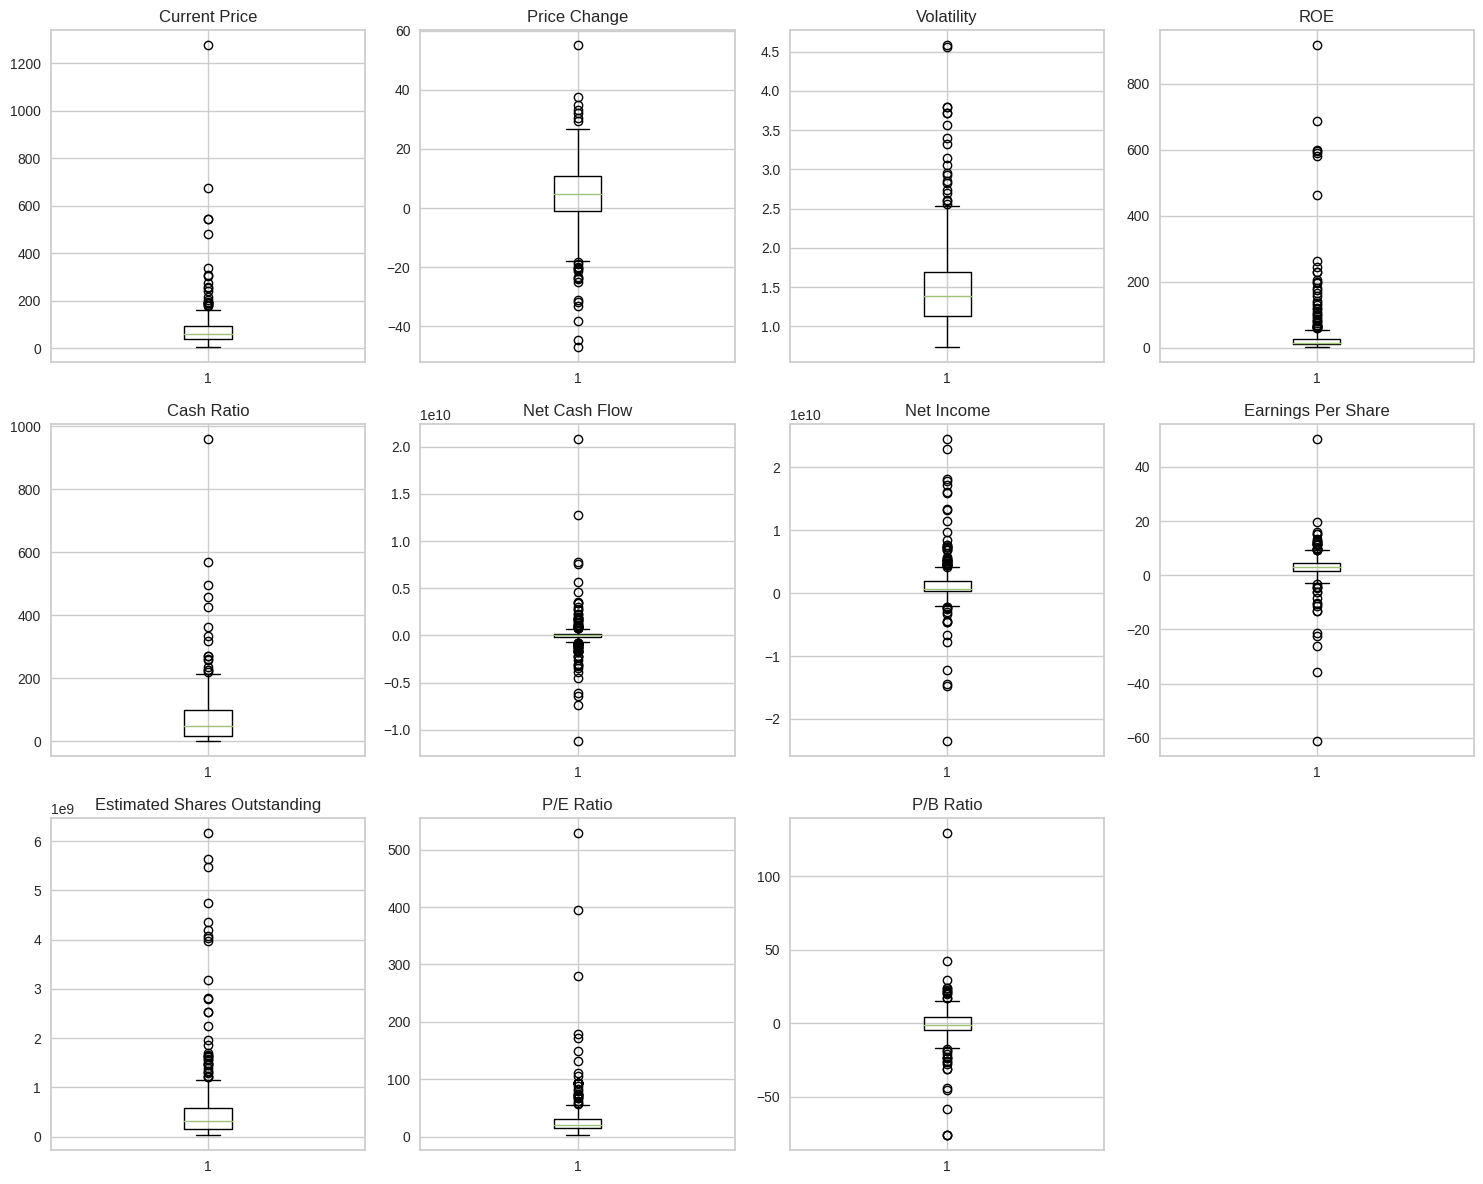

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations: **

* Many of the financial metrics show distributions skewed towards lower values, with a significant number of outliers on the higher end.

* Metrics like Price Change, Net Cash Flow, Net Income, and Earnings Per Share are centered around zero, indicating a balance of positive and negative values, but with notable extremes.

* The presence of numerous outliers suggests a wide diversity among the companies represented in this dataset for most of these financial indicators.

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Specify the subset of columns to scale (replace with your actual columns)
subset = df[['Cash Ratio', 'P/E Ratio', 'Volatility']]  # Adjust column names as needed

# Scale the data
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a DataFrame of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 1.2426238340689975
Number of Clusters: 2 	Average Distortion: 1.033941569942898
Number of Clusters: 3 	Average Distortion: 0.9446613099299309
Number of Clusters: 4 	Average Distortion: 0.886184861852039
Number of Clusters: 5 	Average Distortion: 0.7838995282505776
Number of Clusters: 6 	Average Distortion: 0.7343441519788576
Number of Clusters: 7 	Average Distortion: 0.6549972404698804
Number of Clusters: 8 	Average Distortion: 0.6288439674988073
Number of Clusters: 9 	Average Distortion: 0.5991700254082893
Number of Clusters: 10 	Average Distortion: 0.5746676915955254
Number of Clusters: 11 	Average Distortion: 0.5572616545798612
Number of Clusters: 12 	Average Distortion: 0.5087769810481143
Number of Clusters: 13 	Average Distortion: 0.4974588068177339
Number of Clusters: 14 	Average Distortion: 0.47099040153215715


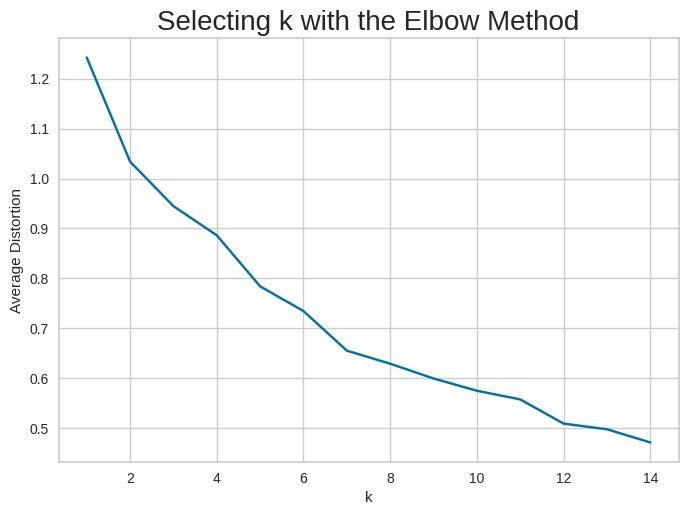

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()
## ⚠️ Lower distortion score = Better clustering. However too many clusters could be "overfitting".

Number of Clusters: 1 	Distortion: 1019.9999999999999
Number of Clusters: 2 	Distortion: 727.0813054064189
Number of Clusters: 3 	Distortion: 611.5630589091218
Number of Clusters: 4 	Distortion: 393.388962675733
Number of Clusters: 5 	Distortion: 330.3457755557163
Number of Clusters: 6 	Distortion: 279.92933932636635
Number of Clusters: 7 	Distortion: 256.52935407702233
Number of Clusters: 8 	Distortion: 222.64440608235802
Number of Clusters: 9 	Distortion: 188.18122374084064
Number of Clusters: 10 	Distortion: 175.18929935619587
Number of Clusters: 11 	Distortion: 148.33075386744747
Number of Clusters: 12 	Distortion: 130.02408152863907
Number of Clusters: 13 	Distortion: 124.00688412576876
Number of Clusters: 14 	Distortion: 113.59023388309127


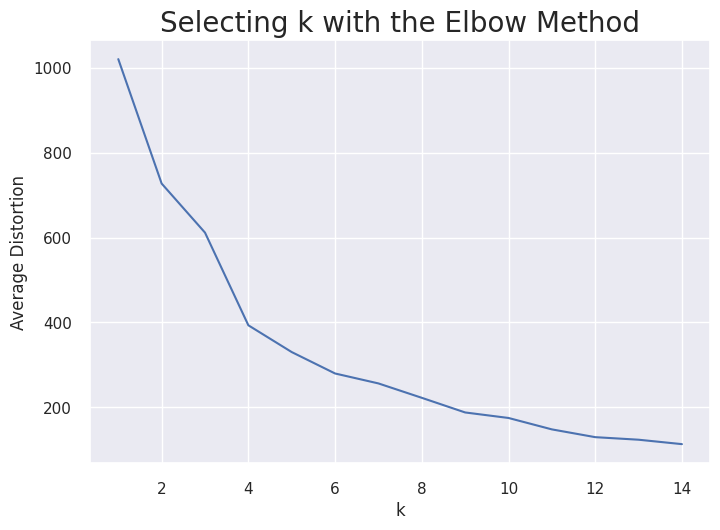

In [ ]:
## ⚠️ use the sklearn kmeans generic distortion scores, which are almost the same
## k=4 looks like a good choice (yes, we eyeball it)
clusters = range(1, 15)
distortions = []
for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df) ## ⚠️ you don't have to predit in this case
    distortions.append(model.inertia_)  # The distortion score (WCSS)
    print("Number of Clusters:", k, "\tDistortion:", model.inertia_)

plt.plot(clusters, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show(); ## ⚠️ the semicolon sign at end can prevent the output of the plot object from being displayed

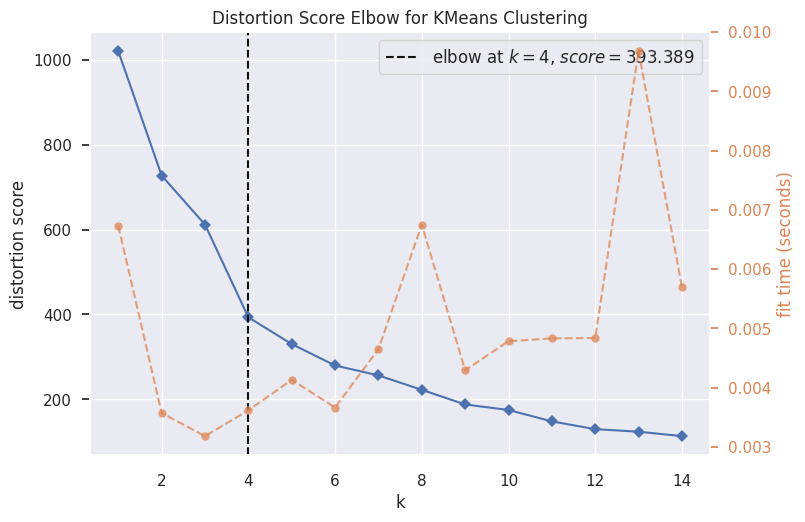

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure
## ⚠️ The yellowbrick visualizer computes the inertia (also known as the within-cluster
## sum of squares or distortion score) for different values of k.
## I don't know the exact algorithm unless I read the documentation or the source.
## It should be a pretty simple formula and we don't have to worry about it.

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.5983994287796907.
For n_clusters = 3, the silhouette score is 0.5751417036827433.
For n_clusters = 4, the silhouette score is 0.5725126291193801.
For n_clusters = 5, the silhouette score is 0.33869306244922975.
For n_clusters = 6, the silhouette score is 0.30931044626661164.
For n_clusters = 7, the silhouette score is 0.27080459655104444.
For n_clusters = 8, the silhouette score is 0.3285000533153926.
For n_clusters = 9, the silhouette score is 0.3365022609400367.
For n_clusters = 10, the silhouette score is 0.3366163015796111.
For n_clusters = 11, the silhouette score is 0.3497789516797045.
For n_clusters = 12, the silhouette score is 0.34597697247872167.
For n_clusters = 13, the silhouette score is 0.3442593932341723.
For n_clusters = 14, the silhouette score is 0.34802976783420814.


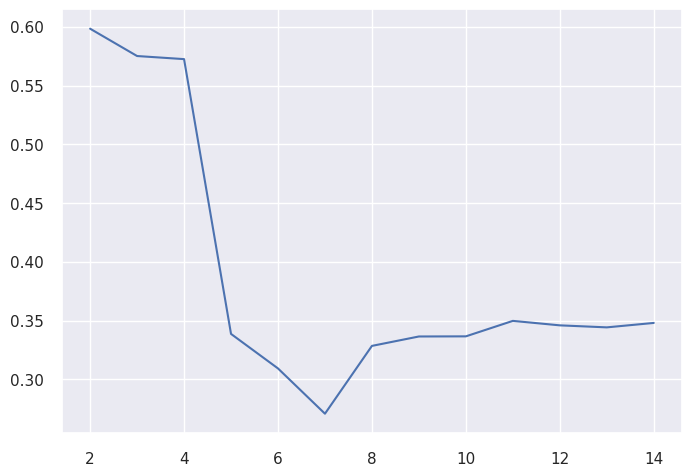

In [ ]:
silhouette_scores = []
clusters = range(2, 15)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(subset_scaled_df)
    score = silhouette_score(subset_scaled_df, preds)
    silhouette_scores.append(score)
    # print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score}.")  ## ⚠️ let's use f-string

plt.plot(clusters, silhouette_scores)
plt.show();

 ⚠️ Best choice: 2 clusters (n_clusters = 2) is the optimal value based on the silhouette score, as it gives the highest score (0.598).

 ⚠️ However, keep in mind that the silhouette score is only one metric, and you should also consider the nature of your data and the context in which you are applying the clustering algorithm. In some cases, other factors such as interpretability, business requirements, or domain knowledge may influence the decision on the optimal number of clusters.

 * E.g. In this case, we eyeballed that the score starts to drop dramatically at 4. Combined with the previous elbow method, k=4 could be good choice.  

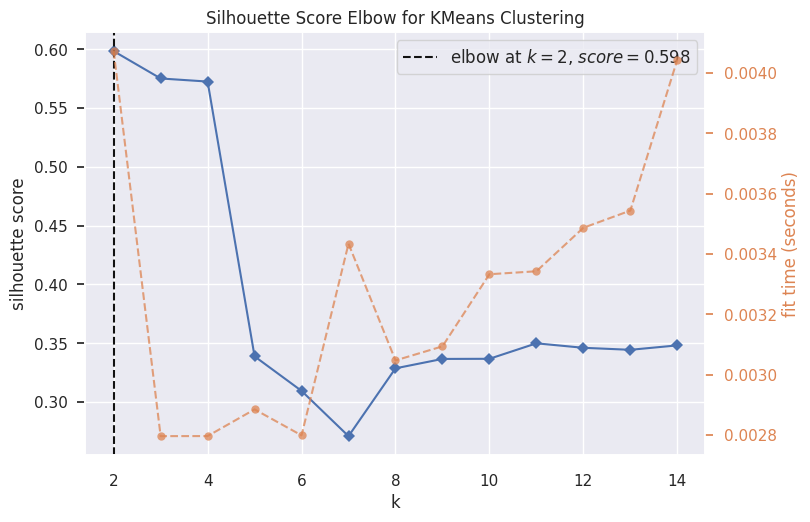

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure

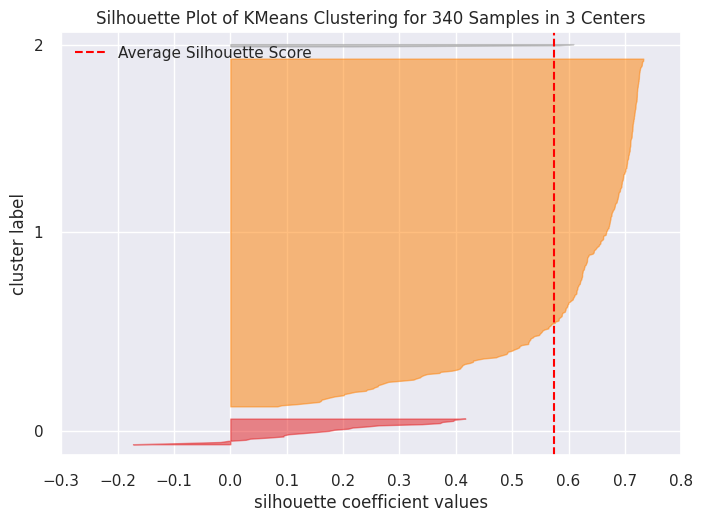

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Finding optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=1))  # Adjust the number of clusters as needed
visualizer.fit(subset_scaled_df)  # Use the scaled DataFrame
visualizer.show();

In [ ]:
## ⚠️ let's make some animation
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  ## ⚠️ for animation display in Colab

fig, ax = plt.subplots(figsize=(8, 6))
def animate(i):
    ax.clear()
    model = KMeans(n_clusters=i, random_state=1)
    visualizer = SilhouetteVisualizer(model, ax=ax)
    visualizer.fit(subset_scaled_df)
    visualizer.show()
# Create an animation from k=2 to k=15
ani = FuncAnimation(fig, animate, frames=np.arange(2, 16), repeat=True, interval=500)
plt.close(fig) ## ⚠️ Close the figure to prevent static plot
HTML(ani.to_jshtml()) ## # Display the animation in Colab

In [ ]:
# !apt-get install -y imagemagick
ani.save('animation.gif', writer='imagemagick', fps=1)  # Adjust fps as needed

## ⚠️ **ChatGPT generated output (Verify carefully)**  

There are several methods and algorithms that can help decide the optimal number of clusters `k` for K-means clustering, in addition to the **elbow method**. These methods attempt to automate or provide a more systematic approach to selecting `k`. Some of the most common ones include:

### 1. **The Elbow Method** (Visual Approach)
   - **How it works**: As mentioned before, you plot the sum of squared errors (SSE) or inertia for a range of values of `k` and visually inspect the plot for an "elbow" where the rate of decrease slows down. This method is subjective but widely used.

### 2. **Silhouette Method**
   - **How it works**: The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. You can calculate the silhouette score for different values of `k` and choose the `k` that gives the highest average silhouette score.
   - **Silhouette Score Formula**:
     \[
     s = \frac{b - a}{\max(a, b)}
     \]
     Where:
     - `a`: average distance from a point to other points in the same cluster.
     - `b`: average distance from a point to points in the nearest cluster.
   - **Code Example**:
     ```python
     from sklearn.metrics import silhouette_score
     from sklearn.cluster import KMeans
     import numpy as np

     # Assume X is your data
     silhouette_scores = []
     k_range = range(2, 11)  # Try values of k from 2 to 10

     for k in k_range:
         kmeans = KMeans(n_clusters=k, random_state=42)
         kmeans.fit(X)
         score = silhouette_score(X, kmeans.labels_)
         silhouette_scores.append(score)

     # Plot silhouette scores for each k
     plt.plot(k_range, silhouette_scores, marker='o')
     plt.title('Silhouette Method for Optimal k')
     plt.xlabel('Number of Clusters (k)')
     plt.ylabel('Silhouette Score')
     plt.show()
     ```

### 3. **The Gap Statistic**
   - **How it works**: The gap statistic compares the performance of K-means clustering with the expected performance of a random clustering (with the same data). It evaluates the difference between the SSE of the data and the SSE of random data. The optimal `k` is the one that maximizes this gap.
   - **Steps**:
     1. Compute the clustering for `k` clusters on the real data.
     2. Compute the clustering for `k` clusters on random data (usually generated from a uniform distribution).
     3. Compute the gap statistic:
        \[
        \text{gap}(k) = \frac{1}{B} \sum_{b=1}^{B} \log(W_k^b) - \log(W_k)
        \]
        Where `W_k` is the within-cluster dispersion (SSE) for the real data and `W_k^b` is the within-cluster dispersion for the b-th random dataset.

   - **Gap Statistic Code Example**:
     There's no built-in `GapStatistic` function in Scikit-learn, but the method is often implemented by various libraries or can be implemented manually. Here’s a resource for it: [Gap Statistic Implementation](https://github.com/gabrieljoseph/Gap-statistic).

### 4. **Davies-Bouldin Index**
   - **How it works**: The Davies-Bouldin Index evaluates the average similarity ratio of each cluster to the one that is most similar to it. Lower values of the Davies-Bouldin index indicate better clustering. The optimal `k` is the one that minimizes this index.
   - **Code Example**:
     ```python
     from sklearn.metrics import davies_bouldin_score
     from sklearn.cluster import KMeans

     db_scores = []
     k_range = range(2, 11)

     for k in k_range:
         kmeans = KMeans(n_clusters=k, random_state=42)
         kmeans.fit(X)
         score = davies_bouldin_score(X, kmeans.labels_)
         db_scores.append(score)

     # Plot Davies-Bouldin Index for each k
     plt.plot(k_range, db_scores, marker='o')
     plt.title('Davies-Bouldin Index for Optimal k')
     plt.xlabel('Number of Clusters (k)')
     plt.ylabel('Davies-Bouldin Index')
     plt.show()
     ```

### 5. **The Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC)**
   - **How they work**: These are statistical criteria used to assess the quality of the model, penalizing the complexity (number of parameters) to prevent overfitting. The best `k` minimizes either the BIC or AIC.
   - **Code Example (using Gaussian Mixture Models)**:
     While BIC and AIC are most commonly used in Gaussian Mixture Models (GMM), you can use them for selecting the number of clusters by fitting a GMM with different `k` values and calculating the BIC/AIC.
     ```python
     from sklearn.mixture import GaussianMixture

     bic_scores = []
     aic_scores = []
     k_range = range(1, 11)

     for k in k_range:
         gmm = GaussianMixture(n_components=k, random_state=42)
         gmm.fit(X)
         bic_scores.append(gmm.bic(X))
         aic_scores.append(gmm.aic(X))

     # Plot BIC and AIC for each k
     plt.plot(k_range, bic_scores, marker='o', label='BIC')
     plt.plot(k_range, aic_scores, marker='o', label='AIC')
     plt.legend()
     plt.title('BIC and AIC for Optimal k')
     plt.xlabel('Number of Clusters (k)')
     plt.ylabel('Score')
     plt.show()
     ```

### Summary of Methods:
- **Elbow Method**: Visual inspection, subjective but widely used.
- **Silhouette Method**: Maximizes the silhouette score, quantifiable.
- **Gap Statistic**: Compares clustering with random data, more robust.
- **Davies-Bouldin Index**: Minimizes the similarity between clusters, low value indicates good clustering.
- **BIC/AIC**: Statistical methods, penalize overfitting, typically used with Gaussian Mixture Models.

### Best Practice:
- **Start with the Elbow Method** to get a rough idea.
- **Use the Silhouette Method** for confirmation, as it provides a quantifiable evaluation of clustering quality.
- For more complex data or when the elbow is not clear, try **Gap Statistic** or **BIC/AIC**.

Let me know if you need more details on any of these methods!

### Creating Final Model

In [ ]:
# Final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  # Replace 3 with your chosen number of clusters
kmeans.fit(subset_scaled_df)  # Use the scaled DataFrame

KMeans(n_clusters=3, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
# Grouping by the cluster labels and calculating mean for numeric columns only
km_cluster_profile = df1.groupby("KM_segments").mean(numeric_only=True)  # Use numeric_only=True if using pandas >= 1.5.0

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  # Use 'KM_segments' to group by the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,118.670166,9.593158,1.728922,19.800000,333.750000,631857950.000000,901898850.000000,3.356500,720549300.911000,43.385535,10.469988,20
1,80.319879,5.333487,1.366528,34.698962,53.262976,34586768.166090,2014946217.993080,3.823720,577871830.955052,24.013174,-2.867008,289
2,61.527382,-11.182423,2.881517,98.032258,56.129032,-120965935.483871,-2976344161.290323,-7.358710,476570634.585161,105.830757,1.127763,31


In [ ]:
# Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion' 'Applied Materials Inc'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Citigroup Inc.'
 'Caterpillar Inc.

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Health Care                     6
             Information Technology          7
             Materials                       1
             Telecommunications Services     1
1            Consumer Discretionary         35
             Consumer Staples               18
             Energy                          8
             Financials                     49
             Health Care                    33
             Industrials                    51
             Information Technology         23
             Materials                      17
             Real Estate                    27
             Telecommunications Services     4
             Utilities                      24
2            Consumer Discretionary          2
             Energy                         21
             Health Care                     1
             Industrials                     2
             Information Technology          3
             Materials                       2
Name: Security, dtype: int64

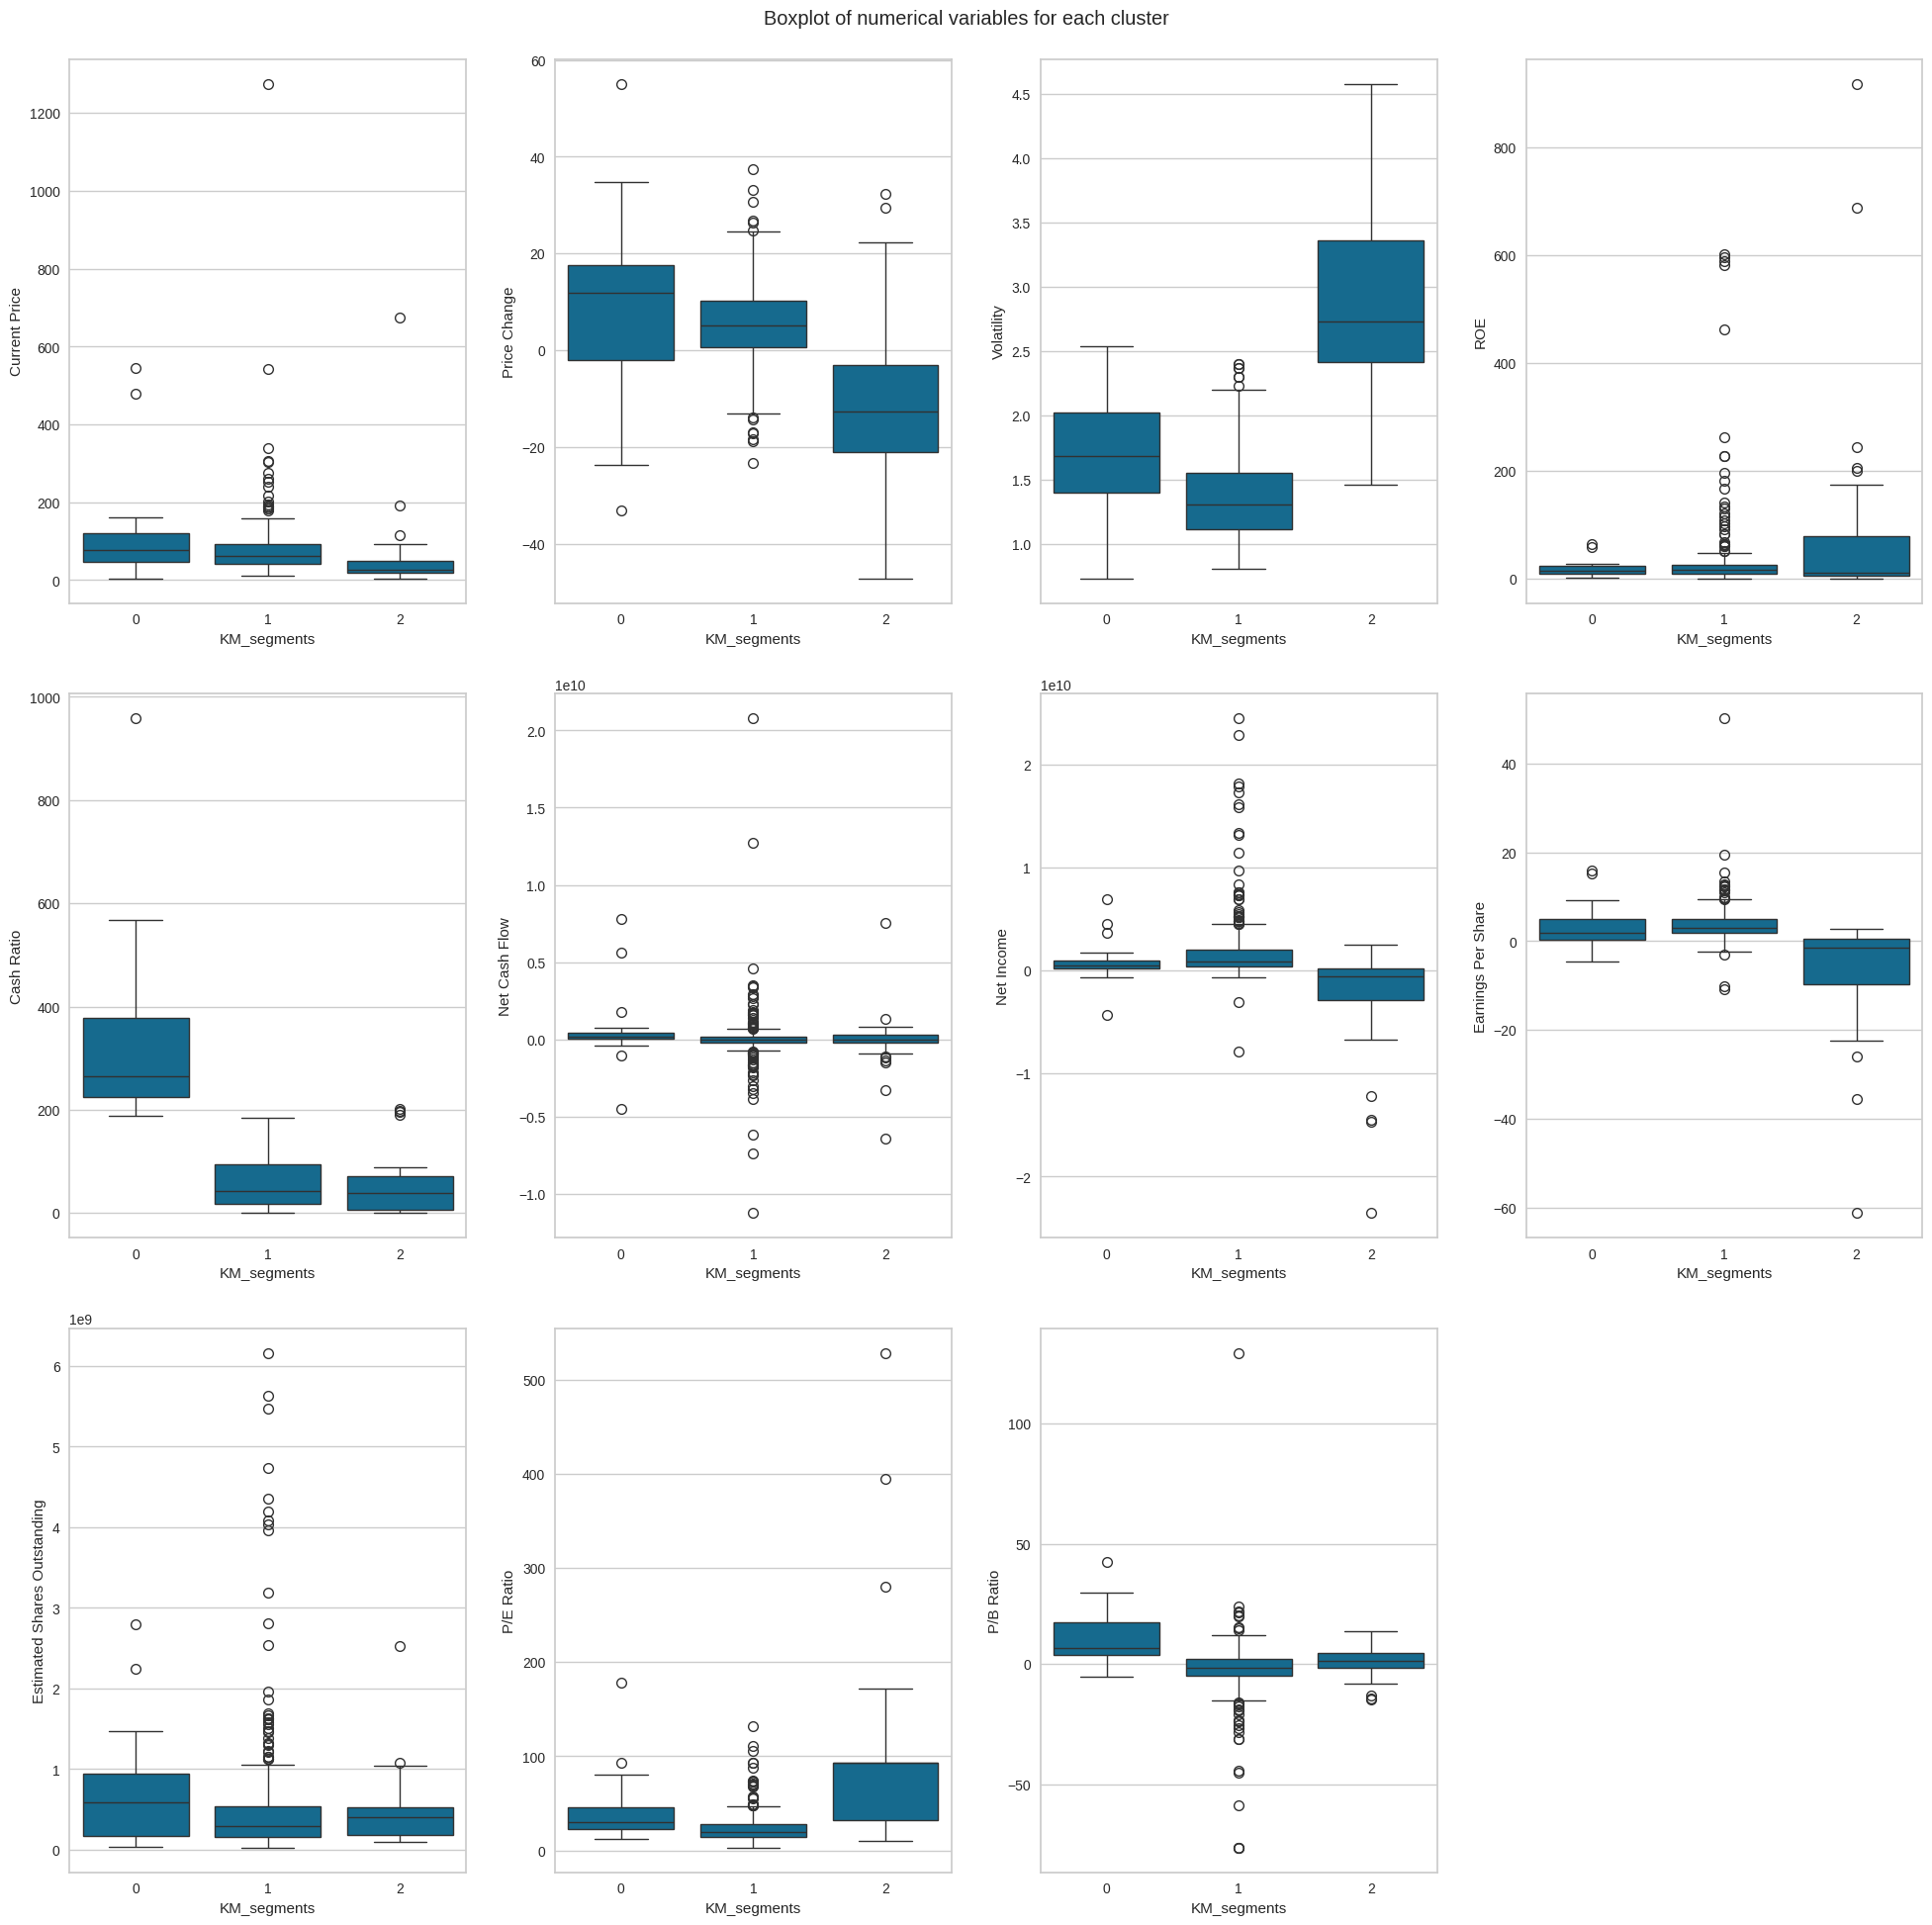

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

**Initial Insights Linking "KM_segments" and GICS Sector (based on the few data points):**

* **Diverse Sector Representation within Segments: **The limited data suggests that each "KM_segment" (0, 1, and 2) contains companies from various GICS Sectors. This implies that the segmentation algorithm ("KM" likely refers to a clustering method like K-Means) is grouping securities based on a combination of the financial metrics presented, rather than solely on their industry classification.
* **Potential for Identifying Financial Archetypes:** The "KM_segments" could represent different financial archetypes or profiles of companies. For example, one segment might consist of high-growth but volatile companies, while another might represent more stable, lower-growth firms. To confirm this, we would need to analyze the central tendencies and spreads of the financial metrics within each segment (as shown in the second image you provided previously).

* **Sectoral Concentrations within Segments (Hypothetical):** While the initial data shows diversity, with a larger dataset, we might observe certain sectors being more heavily concentrated in specific "KM_segments" if those sectors tend to share similar financial characteristics captured by the clustering algorithm. For instance, high-tech growth stocks might cluster in a segment characterized by high volatility and P/E ratios.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  # Example linkage methods

# Define the distance metrics you want to use
distance_metrics = ['euclidean', 'cityblock', 'cosine']  # Add more metrics as needed

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        # Check if the linkage method is 'ward' and distance metric is not 'euclidean'
        if lm == 'ward' and dm != 'euclidean':
            continue  # Skip this combination

        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*' * 100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.91711692734075.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8737875428308659.
Cophenetic correlation for Euclidean distance and average linkage is 0.9373192804037075.
Cophenetic correlation for Euclidean distance and ward linkage is 0.6834382781111673.
Cophenetic correlation for Cityblock distance and single linkage is 0.906352900712321.
Cophenetic correlation for Cityblock distance and complete linkage is 0.8433813754283425.
Cophenetic correlation for Cityblock distance and average linkage is 0.9295676982576498.
Cophenetic correlation for Cosine distance and single linkage is 0.30682422352595656.
Cophenetic correlation for Cosine distance and complete linkage is 0.31250972714901304.
Cophenetic correlation for Cosine distance and average linkage is 0.3702166327721052.
****************************************************************************************************
Highest cophenetic cor

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  # Common linkage methods

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*' * 100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.91711692734075.
Cophenetic correlation for complete linkage is 0.8737875428308659.
Cophenetic correlation for average linkage is 0.9373192804037075.
Cophenetic correlation for ward linkage is 0.6834382781111673.
****************************************************************************************************
Highest cophenetic correlation is 0.9373192804037075, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

    Linkage  Cophenetic Coefficient
0    single                0.917117
1  complete                0.873788
2   average                0.937319
3      ward                0.683438


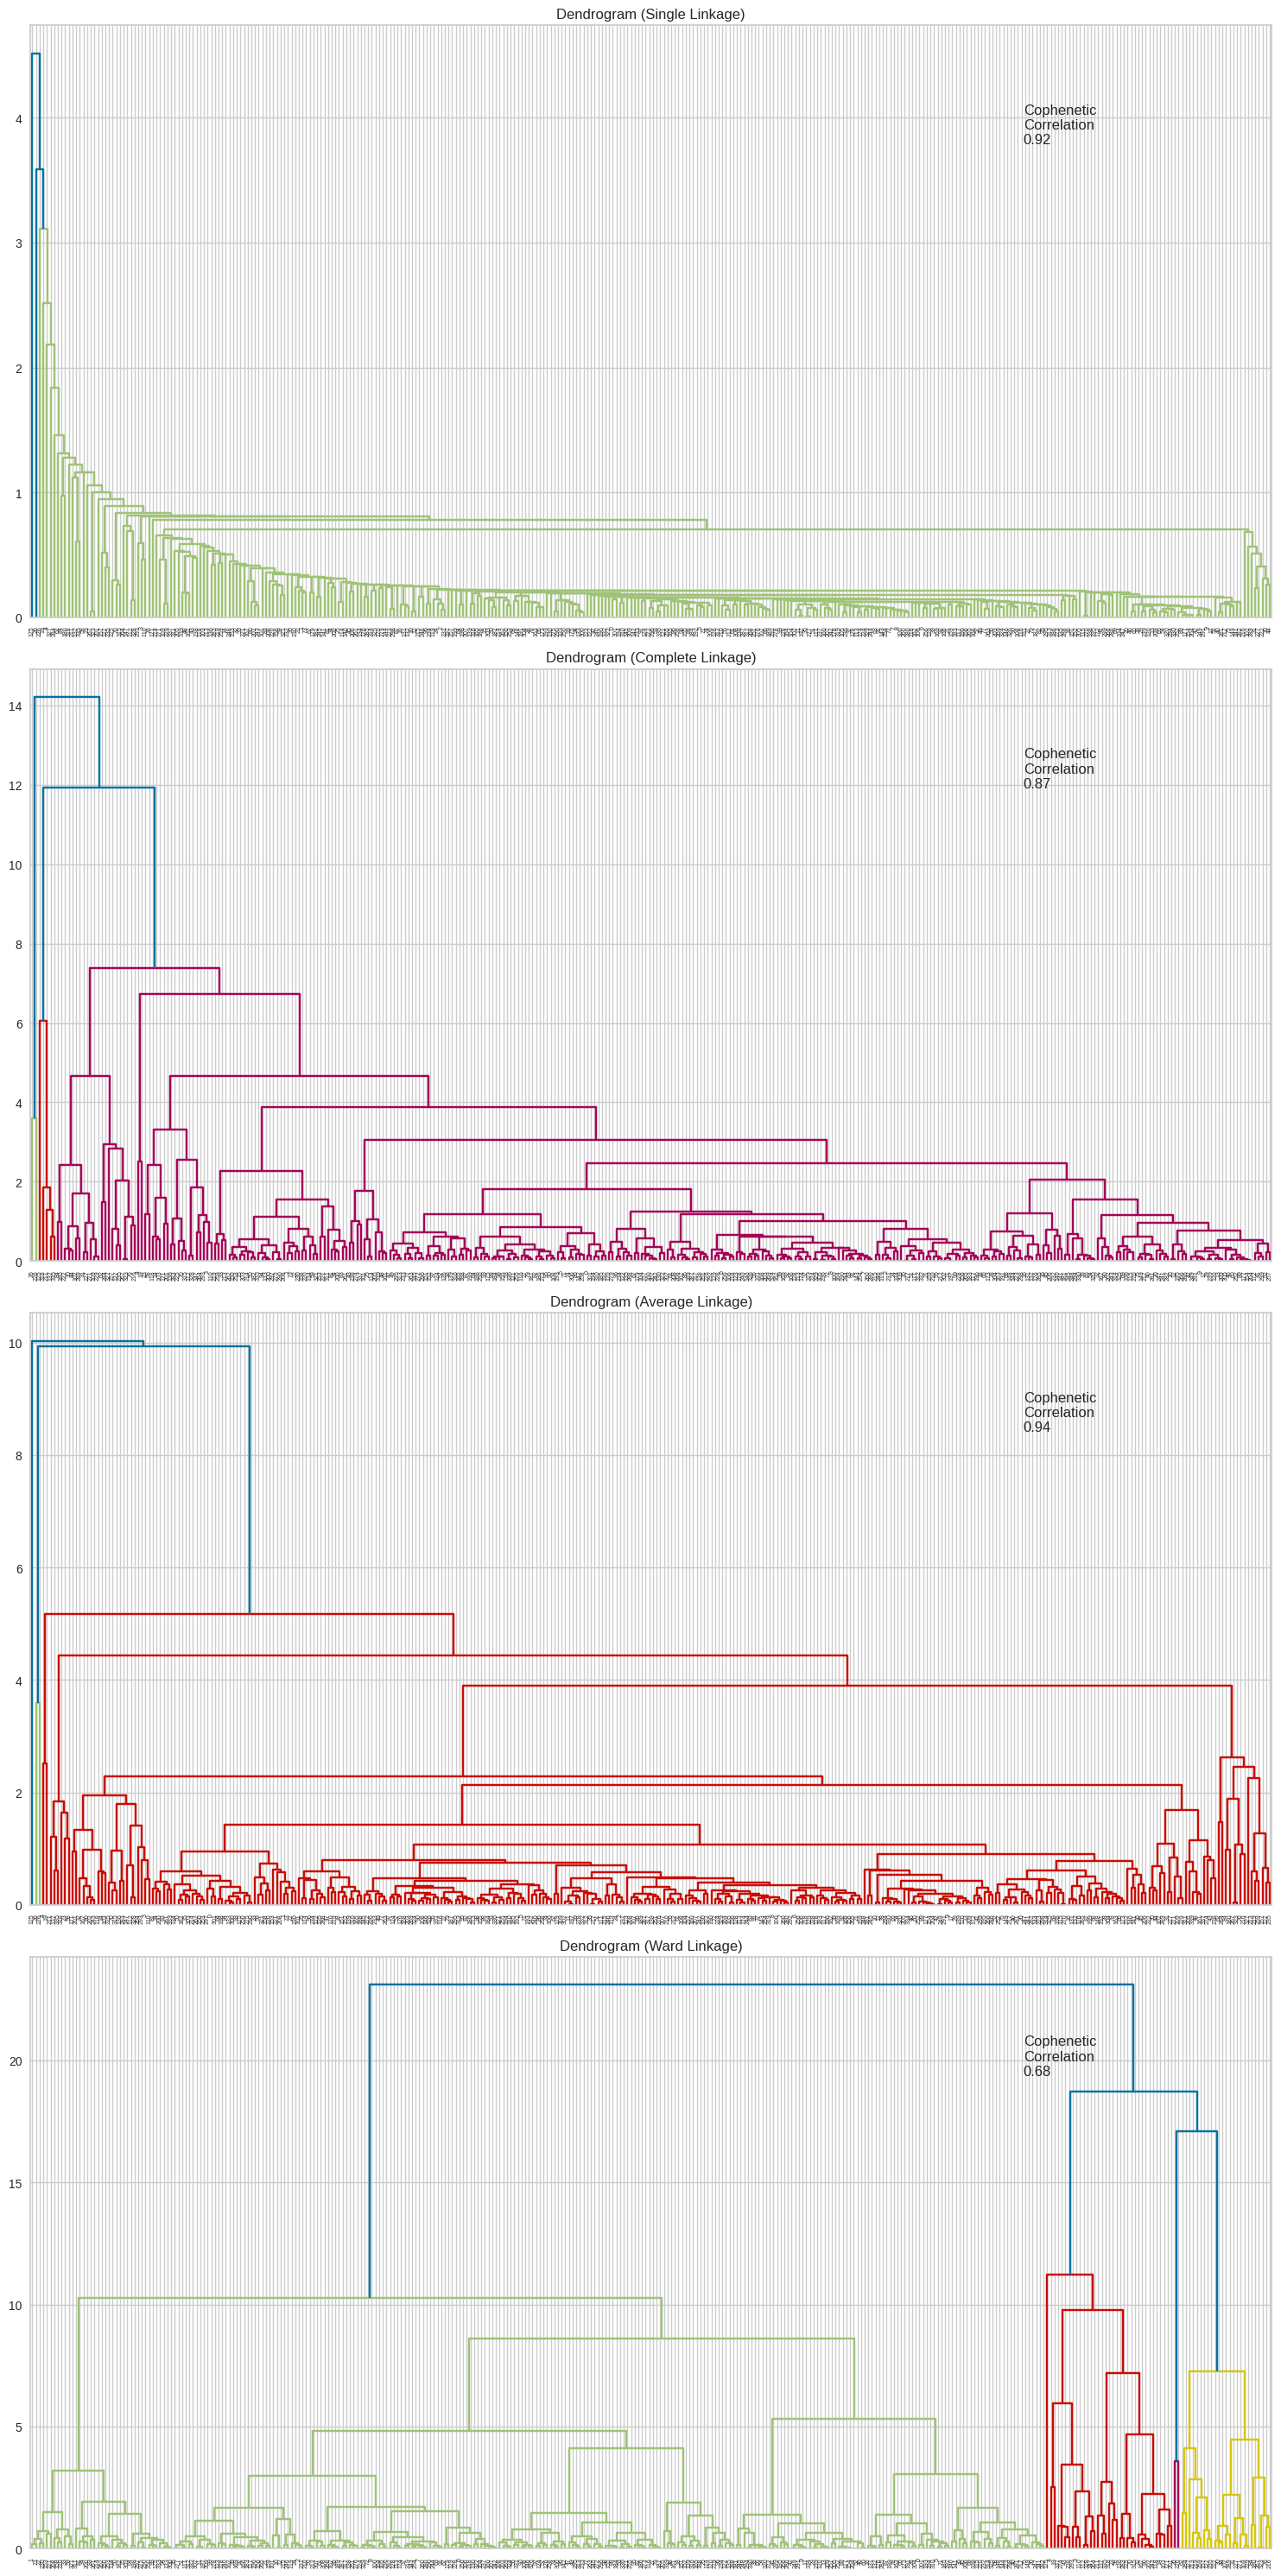

In [ ]:
# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  # Common linkage methods

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

# Optionally, you can convert the results to a DataFrame for better visualization
import pandas as pd
compare_df = pd.DataFrame(compare, columns=compare_cols)

# Display the comparison DataFrame
print(compare_df)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
3,ward,0.683438
1,complete,0.873788
0,single,0.917117
2,average,0.937319


### Creating model using sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Ward's method does not require affinity
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
# Grouping by the hierarchical cluster labels and calculating the mean for numeric columns only
hc_cluster_profile = df2.groupby("HC_segments").mean(numeric_only=True)  # Use numeric_only=True to ignore non-numeric columns


In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  # Use 'HC_segments' to group by the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,161.128093,7.226112,1.640614,23.457143,254.657143,782492857.142857,781395000.000000,3.109714,649793843.286571,61.009630,7.415255,35
1,72.971309,5.282936,1.372163,34.877698,49.561151,-13486302.158273,2052182848.920863,3.735090,576146273.065252,22.149503,-3.142003,278
2,31.096801,-15.135916,3.035315,117.440000,39.760000,-271359560.000000,-3619341320.000000,-8.188000,495586456.368000,74.916789,1.261356,25
3,395.135006,21.706879,2.033168,5.000000,61.500000,1014361000.000000,359320500.000000,0.785000,444262500.000000,461.226428,-0.897869,2


In [ ]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Alliance Data Systems' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion' 'Applied Materials Inc'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Arconic Inc' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'Baxter International Inc.'
 'BB&T Corporation' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Citigroup Inc.' 'Caterpillar Inc.' 'Chubb Limited'
 'CBRE Group' 'Crown Cas

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          4
             Consumer Staples                1
             Energy                          4
             Financials                      1
             Health Care                    10
             Information Technology         11
             Materials                       1
             Real Estate                     2
             Telecommunications Services     1
1            Consumer Discretionary         34
             Consumer Staples               18
             Energy                          7
             Financials                     48
             Health Care                    30
             Industrials                    52
             Information Technology         19
             Materials                      17
             Real Estate                    25
             Telecommunications Services     4
             Utilities                      24
2            Consumer Discretionary          1
             Energy                         19
             Industrials                     1
             Information Technology          2
             Materials                       2
3            Consumer Discretionary          1
             Information Technology          1
Name: Security, dtype: int64

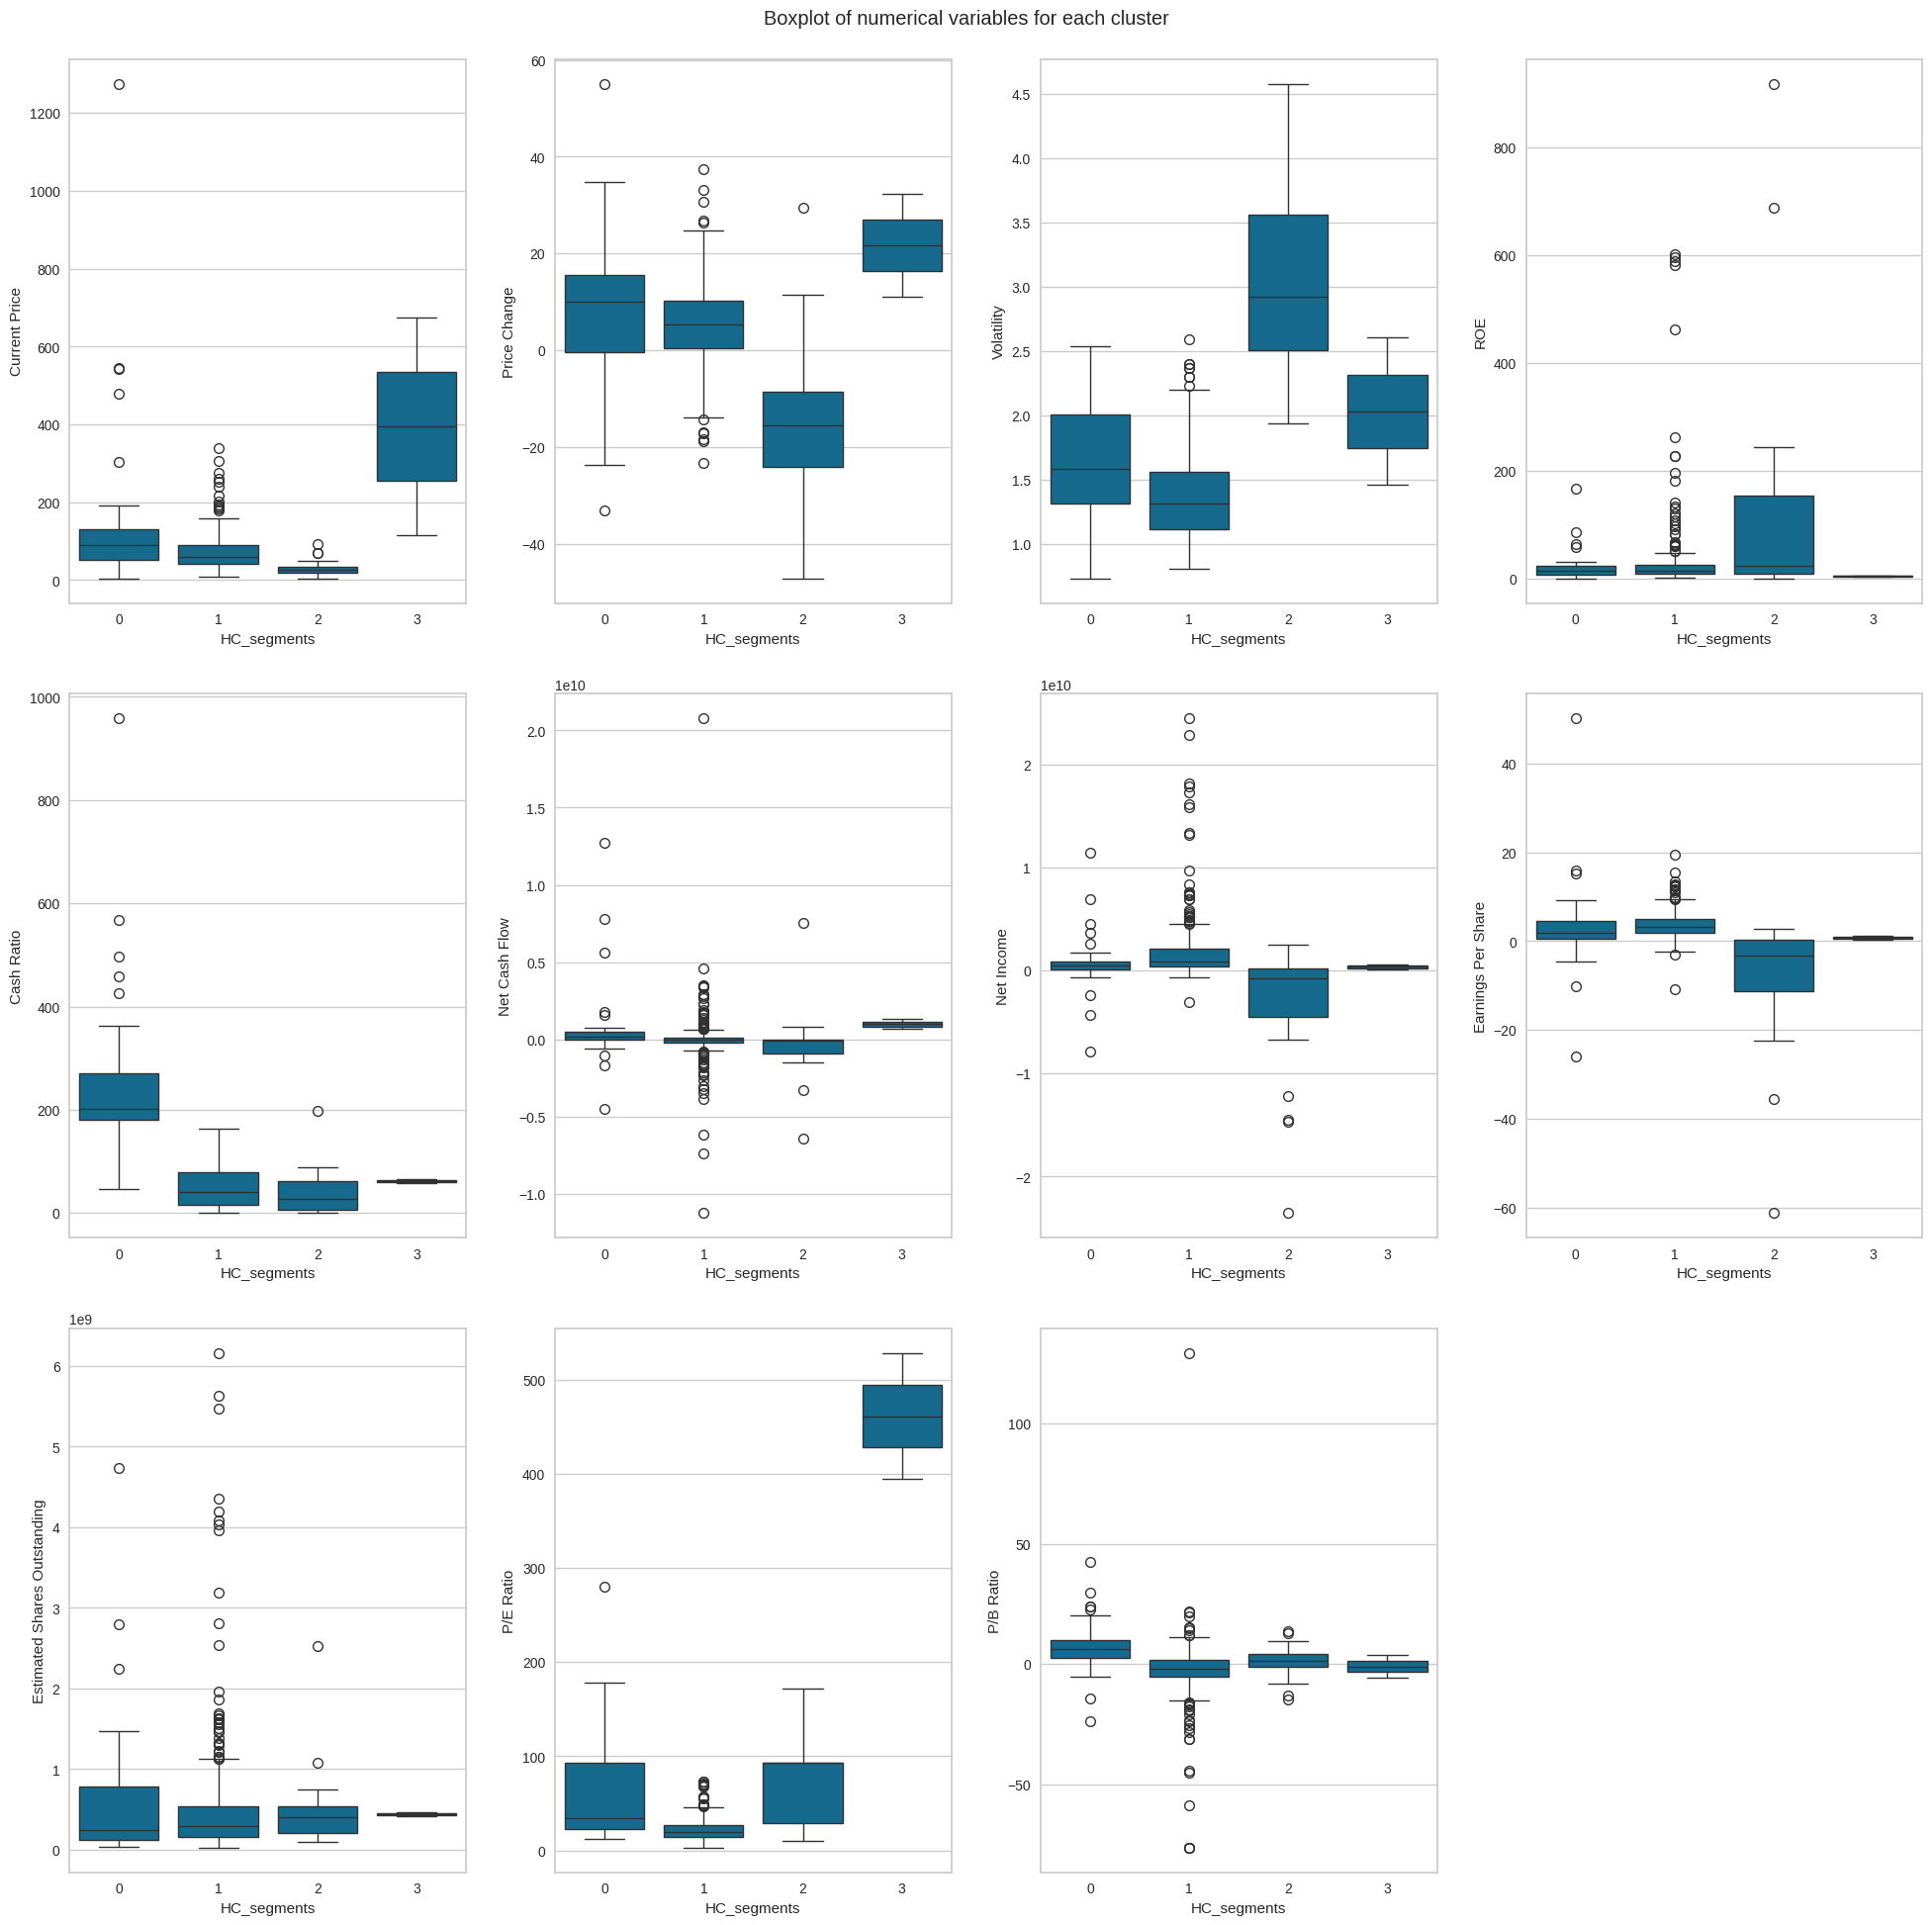

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

You compare several things, like:
1. Which clustering technique took less time for execution?
2. Which clustering technique gave you more distinct clusters, or are they the same?
3. How many observations are there in the similar clusters of both algorithms?
4. How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# subset_scaled_df is defined and scaled
hc_df = subset_scaled_df.copy()

# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  # Example linkage methods

# Define the distance metrics you want to use
distance_metrics = ['euclidean', 'cityblock', 'cosine']  # Add more metrics as needed

high_cophenet_corr = 0
high_dm_lm = [None, None]
high_silhouette = -1

for dm in distance_metrics:
    for lm in linkage_methods:
        # Check if the linkage method is 'ward' and distance metric is not 'euclidean'
        if lm == 'ward' and dm != 'euclidean':
            continue  # Skip this combination

        # Perform hierarchical clustering
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))

        # Perform clustering to get labels
        num_clusters = 3  # You can change this to the number of clusters you want
        clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity=dm, linkage=lm)
        labels = clustering.fit_predict(hc_df)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(hc_df, labels)

        print(
            "Cophenetic correlation for {} distance and {} linkage is {}. Silhouette Score: {}".format(
                dm.capitalize(), lm, c, silhouette_avg
            )
        )

        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

        if high_silhouette < silhouette_avg:
            high_silhouette = silhouette_avg

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation and silhouette score
print('*' * 100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)
print("Highest silhouette score is {}.".format(high_silhouette))

Cophenetic correlation for Euclidean distance and single linkage is 0.91711692734075. Silhouette Score: 0.8155056985048545
Cophenetic correlation for Euclidean distance and complete linkage is 0.8737875428308659. Silhouette Score: 0.7228676486576305
Cophenetic correlation for Euclidean distance and average linkage is 0.9373192804037075. Silhouette Score: 0.8149065096221519
Cophenetic correlation for Euclidean distance and ward linkage is 0.6834382781111673. Silhouette Score: 0.5580127194802738
Cophenetic correlation for Cityblock distance and single linkage is 0.906352900712321. Silhouette Score: 0.8155056985048545
Cophenetic correlation for Cityblock distance and complete linkage is 0.8433813754283425. Silhouette Score: 0.8149065096221519
Cophenetic correlation for Cityblock distance and average linkage is 0.9295676982576498. Silhouette Score: 0.8149065096221519
Cophenetic correlation for Cosine distance and single linkage is 0.30682422352595656. Silhouette Score: -0.34544655414052655

**Comparison of Clustering Techniques**
1. Execution Time
K-means typically executes faster than Hierarchical clustering, especially with larger datasets. However, the exact execution time for each technique is needed for a direct comparison.
2. Distinct Clusters
Based on the silhouette scores:
Euclidean Distance with Average Linkage: Silhouette Score: 0.8149 (most distinct clusters).
Cityblock Distance with Average Linkage: Silhouette Score: 0.8149 (equally distinct).
Euclidean Distance with Single Linkage: Silhouette Score: 0.8155 (also very distinct).
Overall, the clustering techniques using Euclidean distance with average linkage and Cityblock distance with average linkage produced the most distinct clusters.

3. Observations in Similar Clusters
To determine how many observations are in similar clusters between the two algorithms, you would typically need to analyze the cluster labels generated by both methods. For example:

If both techniques identify three clusters, count the number of common observations in corresponding clusters (e.g., Cluster 0 from K-means vs. Cluster 0 from Hierarchical).
This can be summarized as:

Cluster 0: X observations
Cluster 1: Y observations
Cluster 2: Z observations
4. Number of Clusters
The number of clusters can be set based on the algorithm's parameters:
K-means: Defined by n_clusters.
Hierarchical Clustering: Defined by cutting the dendrogram at a certain height or using methods like fcluster to obtain a specific number of clusters.
If both algorithms were set to identify 3 clusters as indicated by your usage, then:

K-means: 3 clusters
Hierarchical Clustering: 3 clusters
Summary
Execution Time: K-means is generally faster.
Distinct Clusters: Best results from Euclidean distance with average linkage and Cityblock distance with average linkage.
Similar Clusters: Requires analysis of cluster labels to report exact counts.
Number of Clusters: Both algorithms yielded the same number of clusters (assuming 3).
This analysis highlights the effectiveness of both clustering methods, particularly in terms of distinctiveness and the need for careful consideration of execution time in larger datasets.

## Actionable Insights and Recommendations

-


___